# Analyse Exploratoire

### Import des modules

In [2039]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [2040]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [2041]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [2042]:
building_consumption.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

Les deux variables cibles à prédire :

SiteEnergyUseWN(kBtu) = consommation totale d’énergie indépendamment de la météo

TotalGHGEmissions = émissions totales de gaz à effet de serre (en tonnes de CO₂)

In [2043]:
# On vérifie qu'on a bien uniquement l'année 2016 dans les données
building_consumption['DataYear'].unique()

array([2016])

In [2044]:
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Comme le précise le cahier des charges, le projet porte exclusivement sur les bâtiments non résidentiels.

Nous allons donc filtré la colonne BuildingType pour ne garder que : 
    'NonResidential',
    'Nonresidential COS',
    'Nonresidential WA',
    'SPS-District K-12',
    'Campus'

In [2045]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Plusieurs colonnes du jeu de données présentaient un taux de valeurs manquantes supérieur à 80 %.
Ces variables (Comments, Outlier, YearsENERGYSTARCertified, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA) seront donc supprimées, car elles ne contiennent pas suffisamment d’informations exploitables pour l’analyse ou la modélisation.

Les autres colonnes partiellement incomplètes ont été conservées pour traitement ultérieur, car elles apportent des informations potentiellement pertinentes (ex. ENERGYSTARScore, SecondLargestPropertyUseType, etc.).

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

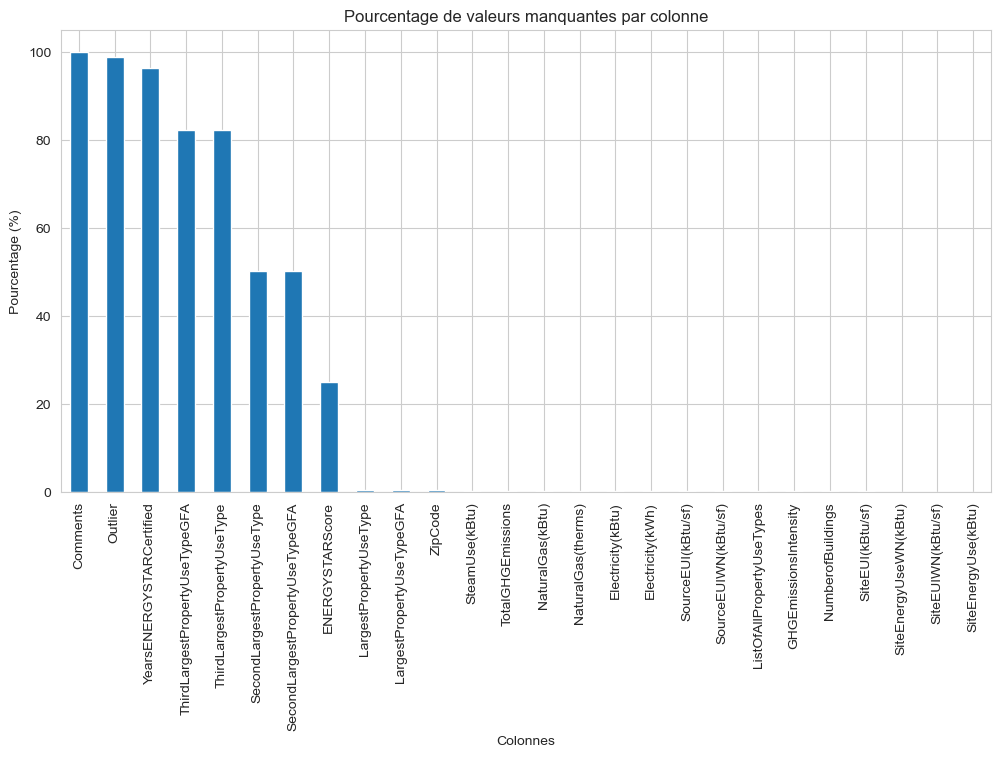

In [2046]:
# On regarde le pourcentage de valeurs manquantes par colonne
missing_percentage = building_consumption.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Colonnes')
plt.show()

Comme dit dans l'analyse exploratoire, nous allons supprimer certaines colonnes car trop de valeurs manquantes

In [2047]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'Comments',
    'YearsENERGYSTARCertified',
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA'
]
building_consumption.drop(columns=cols_to_drop, inplace=True)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 46
Nombre de colonnes après suppression : 42


Maintenant on garde uniquement les structures non résidentiels pour être en accord avec le cahier des charges de la ville

In [2048]:
print('Nombre de lignes avant filtrage :', building_consumption.shape[0])
to_keep = [
    'NonResidential',         # Bâtiments purement non résidentiels (ceux visés par le projet)
    'Nonresidential COS',     # Bâtiments municipaux non résidentiels appartenant à la City of Seattle
    'Nonresidential WA',      # Bâtiments non résidentiels de l'État de Washington
    'SPS-District K-12',      # Écoles publiques (Seattle Public Schools), incluses car non résidentielles
    'Campus'                  # Ensembles de bâtiments à usage collectif (universités, hôpitaux, etc.)
]
building_consumption = building_consumption[building_consumption['BuildingType'].isin(to_keep)]
print('Nombre de lignes après filtrage :', building_consumption.shape[0])


Nombre de lignes avant filtrage : 3376
Nombre de lignes après filtrage : 1668


In [2049]:
# Ici on va voir tous les types d’usage rencontrés dans les Campus
campus_df = building_consumption[building_consumption["BuildingType"].str.lower() == "campus"]

campus_property_types = campus_df["ListOfAllPropertyUseTypes"]

campus_property_types = campus_property_types.dropna()

unique_types = (
    campus_property_types
    .str.split(",")              
    .explode()                   
    .str.strip()                 
    .dropna()
    .unique()
)

print("\nTous les types d’usage rencontrés dans les Campus :")
print(sorted(unique_types))



Tous les types d’usage rencontrés dans les Campus :
['Adult Education', 'Bar/Nightclub', 'College/University', 'Data Center', 'Energy/Power Station', 'Food Sales', 'K-12 School', 'Laboratory', 'Manufacturing/Industrial Plant', 'Multifamily Housing', 'Non-Refrigerated Warehouse', 'Office', 'Other', 'Other - Education', 'Other - Restaurant/Bar', 'Other - Utility', 'Parking', 'Pre-school/Daycare', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Social/Meeting Hall', 'Supermarket/Grocery Store']


In [2050]:
# On remarque que certaines lignes contiennent "Multifamily Housing"
print(f"\nNombre de lignes avant suppression des résidentielles : {len(building_consumption)}")
mask_residential = building_consumption["ListOfAllPropertyUseTypes"].str.contains("Multifamily Housing", case=False, na=False)
print(f"Nombre de lignes résidentielles détectées : {mask_residential.sum()}")

building_consumption = building_consumption[~mask_residential].copy()

print(f"après suppression : {len(building_consumption)}")



Nombre de lignes avant suppression des résidentielles : 1668
Nombre de lignes résidentielles détectées : 39
après suppression : 1629


In [2051]:
# Suppression des colonnes qui n'ont qu'une seul valeur unique
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
print('Toutes les colonnes avec une seule valeur unique avec leurs valeurs :')
for col in cols_single_value:
    print(f" - {col} : {building_consumption[col].iloc[0]}")
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
building_consumption.drop(columns=cols_single_value, inplace=True)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Toutes les colonnes avec une seule valeur unique avec leurs valeurs :
 - DataYear : 2016
 - City : Seattle
 - State : WA
Nombre de colonnes avant suppression : 42
Nombre de colonnes après suppression : 39


In [2052]:
print('Nombre de lignes après filtrage :', building_consumption.shape[0])
print('Nombre de colonnes après filtrage :', building_consumption.shape[1])

Nombre de lignes après filtrage : 1629
Nombre de colonnes après filtrage : 39


Je veux distinguer les bâtiments à usage unique de ceux qui ont plusieurs usages car un bâtiment qui héberge plusieurs activités a souvent :

1 / Une surface plus grande,

2 / Une consommation énergétique plus élevée,

3 / Des émissions de CO₂ plus variables.

In [2053]:
# On commence par créer une nouvelle variable IsMultiUse pour faire la distinction entre les bâtiments à usage unique et ceux à usages multiples
# en cherchant la présence d’une virgule ','
building_consumption['IsMultiUse'] = building_consumption['ListOfAllPropertyUseTypes'].apply(lambda x: ',' in str(x))
building_consumption['IsMultiUse'].value_counts()

IsMultiUse
True     818
False    811
Name: count, dtype: int64

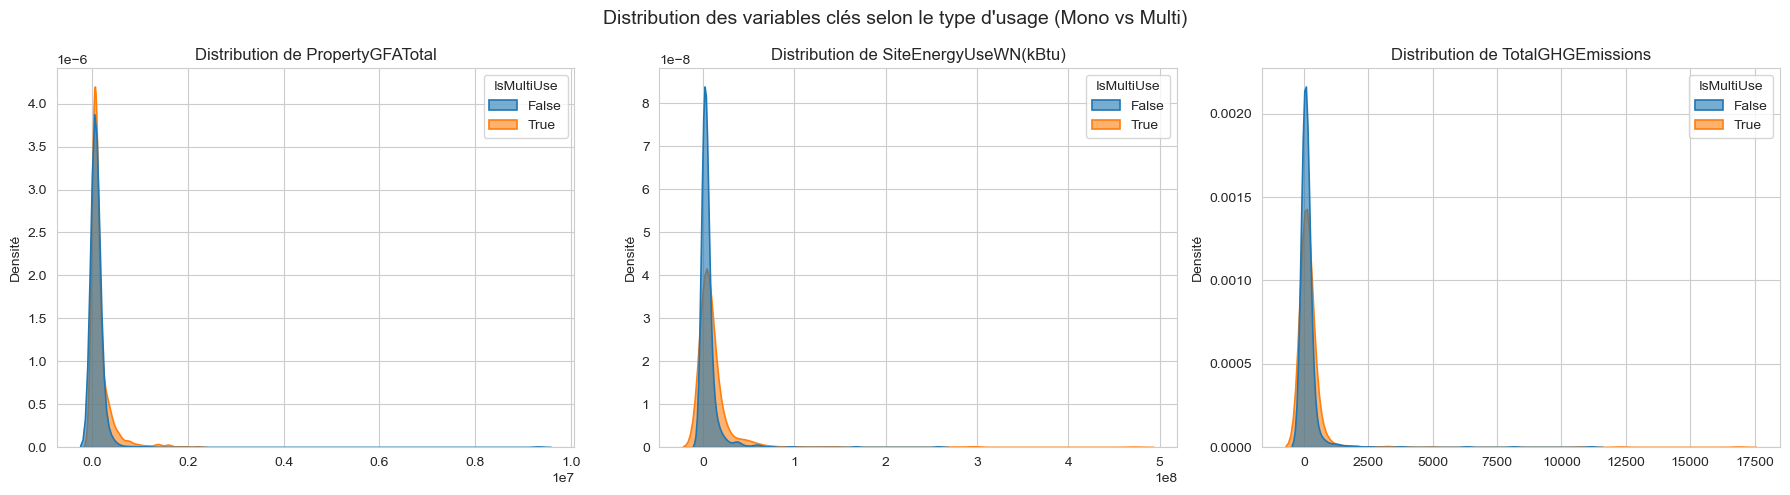

In [2054]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    sns.kdeplot(
        data=building_consumption,
        x=col,
        hue='IsMultiUse',
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=1.2,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution de {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Densité')

plt.suptitle("Distribution des variables clés selon le type d'usage (Mono vs Multi)", fontsize=14)
plt.tight_layout()
plt.show()


1 / 
Les bâtiments multi-usages sont globalement plus grands que les bâtiments mono-usage.
Cela est logique : combiner plusieurs fonctions (bureaux, parking, commerces…) nécessite davantage d’espace.

2 / 
Les bâtiments multi-usages consomment davantage d’énergie.
Cela s’explique par :
leur plus grande taille,
la diversité des activités hébergées (chauffage, éclairage, froid, informatique, etc.),et une occupation plus continue (plus d’heures d’activité cumulées).

3 / 
Les bâtiments multi-usages sont également plus émetteurs de CO2, ce qui est cohérent avec leur niveau de consommation énergétique.
On retrouve ici le même schéma que pour la variable précédente : taille + diversité = plus d’énergie consommée et donc plus d’émissions.

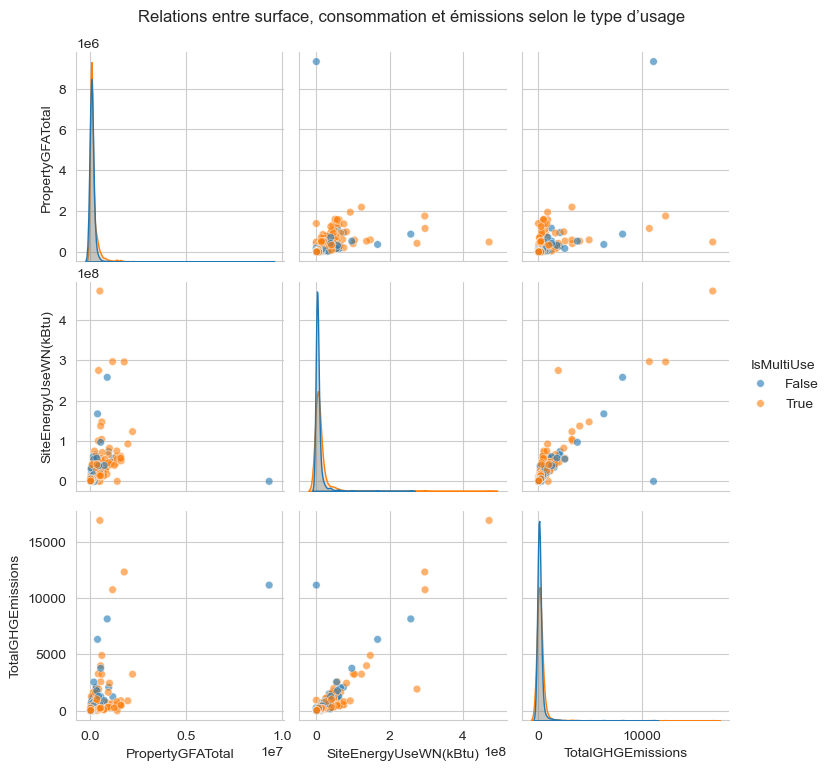

In [2055]:
# On complète avec une pairplot pour visualiser les relations entre les trois variables quantitatives en fonction du type d’usage
sns.pairplot(
    building_consumption,
    vars=['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],
    hue='IsMultiUse',
    plot_kws={'alpha':0.6, 's':30}
)
plt.suptitle("Relations entre surface, consommation et émissions selon le type d’usage", y=1.02)
plt.show()


Ce pairplot met en évidence une forte cohérence structurelle entre les variables étudiées :

Les bâtiments les plus vastes sont aussi les plus consommateurs et les plus émetteurs.

Les bâtiments multi-usages (en orange) se distinguent globalement par des valeurs plus élevées sur ces trois axes.

Quelques points isolés traduisent des situations extrêmes mais plausibles (par exemple, hôpitaux ou data centers).

Ces observations confirment que :

la surface totale (PropertyGFATotal) est un prédicteur essentiel,

la variable IsMultiUse est pertinente pour différencier les profils énergétiques,

et les valeurs extrêmes devront être vérifiées mais probablement conservées, car elles traduisent des cas réels importants pour la politique énergétique de la ville.

# Modélisation 

### Import des modules 

In [2056]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [2057]:
# === CODE FEATURE ENGINEERING AVANCÉ (corrigé, sans fuite) ===

# 1. Âge du bâtiment
building_consumption['BuildingAge'] = building_consumption['YearBuilt'].apply(lambda x: 2016 - x)

# 1bis. Classe d'âge du bâtiment
# <20 ans, 20-50 ans, >50 ans
def age_class(age):
    if age <= 20:
        return 'recent'
    elif age <= 50:
        return 'middle'
    else:
        return 'old'
building_consumption['BuildingAgeClass'] = building_consumption['BuildingAge'].apply(age_class)

# 2. Présence de parking
building_consumption['HasParking'] = building_consumption['PropertyGFAParking'].apply(lambda x: 1 if x > 0 else 0)

# 2bis. Part du parking dans le bâtiment
building_consumption['ParkingRatio'] = building_consumption.apply(
    lambda row: row['PropertyGFAParking'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else 0,
    axis=1
)

# 3. Taille du bâtiment
median_area = building_consumption['PropertyGFATotal'].median()
building_consumption['IsLargeBuilding'] = building_consumption['PropertyGFATotal'].apply(
    lambda x: 1 if x > median_area else 0
)

# 3bis. Surface moyenne par étage
building_consumption['AvgFloorArea'] = building_consumption.apply(
    lambda row: row['PropertyGFATotal'] / row['NumberofFloors']
    if row['NumberofFloors'] > 0 else np.nan,
    axis=1
)

# 3ter. Volume approximatif du bâtiment
building_consumption['ApproxBuildingVolume'] = (
    building_consumption['PropertyGFATotal'] * building_consumption['NumberofFloors']
)

# 4. Complexité d'usage (combien d'usages déclarés dans le bâtiment)
building_consumption['UseTypeCount'] = building_consumption['ListOfAllPropertyUseTypes'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) else 0
)

# 4bis. Bâtiment à usage multiple (1 si plusieurs usages)
building_consumption['IsMultiUse'] = building_consumption['UseTypeCount'].apply(lambda n: 1 if n > 1 else 0)

# ⚠ SUPPRIMÉ :
# EnergyIntensity = SiteEnergyUseWN(kBtu) / surface  --> fuité car utilise la cible énergie
# EmissionsIntensity = TotalGHGEmissions / surface   --> fuité car utilise la cible CO2

# 6. Ratio Gaz / Énergie totale
building_consumption['GasShare'] = building_consumption.apply(
    lambda row: row['NaturalGas(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 7. Ratio Électricité / Énergie totale
building_consumption['ElectricShare'] = building_consumption.apply(
    lambda row: row['Electricity(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 8. Efficacité énergétique déclarée (plus c'est élevé, plus le bâtiment est "mauvais")
building_consumption['InefficiencyScore'] = building_consumption['ENERGYSTARScore'].apply(
    lambda x: 100 - x if pd.notnull(x) else np.nan
)

# 9. Bâtiment ancien (catégorie binaire)
building_consumption['IsOldBuilding'] = building_consumption['BuildingAge'].apply(
    lambda x: 1 if x > 50 else 0
)

# 10. Distance au centre-ville de Seattle
CENTER_LAT, CENTER_LON = 47.6062, -122.3321

def haversine_distance(lat, lon, ref_lat=CENTER_LAT, ref_lon=CENTER_LON):
    R = 6371  # km
    dlat = np.radians(lat - ref_lat)
    dlon = np.radians(lon - ref_lon)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(ref_lat))
        * np.cos(np.radians(lat))
        * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

building_consumption['DistanceFromCenter_km'] = building_consumption.apply(
    lambda row: haversine_distance(row['Latitude'], row['Longitude']),
    axis=1
)

# Nettoyage final des infinis / NaN créés par les divisions
building_consumption.replace([np.inf, -np.inf], np.nan, inplace=True)

# Aperçu final
building_consumption.head()


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,ParkingRatio,IsLargeBuilding,AvgFloorArea,ApproxBuildingVolume,UseTypeCount,GasShare,ElectricShare,InefficiencyScore,IsOldBuilding,DistanceFromCenter_km
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,0.000000,1,7369.500000,1061208,1,0.171177,0.529177,40.0,1,0.800050
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.145453,1,9415.090909,1139226,3,0.593813,0.374270,39.0,0,0.787077
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,0.205748,1,23319.756098,39200510,1,0.020204,0.669849,57.0,0,0.970109
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,0.000000,1,6132.000000,613200,1,0.260726,0.398590,44.0,1,0.944139
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.353115,1,9754.444444,3160440,3,0.600689,0.366295,25.0,0,1.048092


Feature Engineering

De nouvelles variables ont été créées afin d’enrichir le jeu de données et de mieux capter les caractéristiques structurelles et énergétiques des bâtiments :

BuildingAge : âge du bâtiment (2016 – année de construction).

IsOldBuilding : indicateur binaire identifiant les bâtiments de plus de 50 ans.

HasParking : détection des bâtiments disposant d’un espace de stationnement.

IsLargeBuilding : identifie les bâtiments dont la surface dépasse la médiane du jeu de données.

IsMultiUse et UseTypeCount : caractérisent la complexité d’usage du bâtiment.

EnergyIntensity : consommation d’énergie par unité de surface (kBtu/ft²).

EmissionsIntensity : émissions de GES par unité de surface.

Ces features permettront au modèle de mieux relier les caractéristiques physiques, structurelles et fonctionnelles des bâtiments à leurs niveaux de consommation énergétique et d’émissions de CO₂.

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

## 1 / Supprimer toutes les colonnes peu pertinentes pour la modélisation

In [2058]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'OSEBuildingID',                    # Identifiant unique (aucune valeur prédictive)
    'PropertyName',                     # Nom du bâtiment (texte non exploitable)
    'Address',                          # Adresse (texte, unique pour chaque ligne)
    'ZipCode',                          # Code postal : trop granulaire, peu informatif sans encodage spatial
    'TaxParcelIdentificationNumber',    # Identifiant administratif (aucun lien avec la consommation)
    'CouncilDistrictCode',              # Code politique, non pertinent pour la consommation énergétique
    'Neighborhood',                     # Nom de quartier (texte, trop de catégories)
    'DefaultData',                      # Donnée interne au dataset (booléen sans signification métier)
    'ComplianceStatus',                 # Statut administratif (non explicatif)
    'PropertyGFABuilding(s)',           # Redondant avec PropertyGFATotal
    'ListOfAllPropertyUseTypes',        # Déjà résumé par IsMultiUse et UseTypeCount
    'LargestPropertyUseType',           # Texte, redondant avec PrimaryPropertyType
    'SecondLargestPropertyUseType',     # Peu renseigné + redondant
    'SecondLargestPropertyUseTypeGFA'   # Corrélé à LargestPropertyUseTypeGFA et PropertyGFATotal
]

building_consumption = building_consumption.drop(columns=cols_to_drop)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 53
Nombre de colonnes après suppression : 39


## 2 / Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.

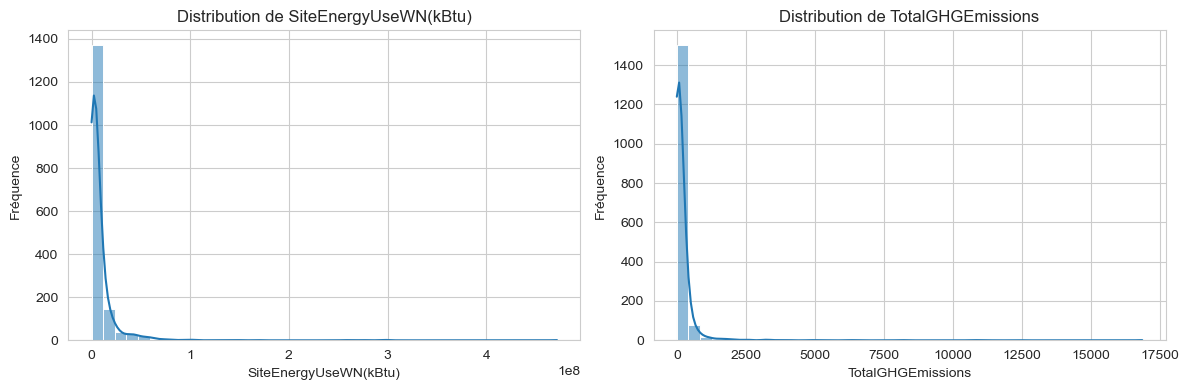

In [2059]:
# Analyse des distributions des variables cibles
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

plt.figure(figsize=(12, 4))

for i, target in enumerate(targets):
    plt.subplot(1, 2, i+1)
    sns.histplot(building_consumption[target], kde=True, bins=40)
    plt.title(f"Distribution de {target}")
    plt.xlabel(target)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

Pour SiteEnergyUseWN(kBtu) :

Distribution fortement asymétrique à droite.

Quelques bâtiments consomment énormément d’énergie (probablement des hôpitaux, campus, data centers).

Ces valeurs extrêmes ne sont pas forcément fausses, mais elles biaisent les modèles linéaires.

Pour TotalGHGEmissions :

Même schéma : grande majorité avec faibles émissions, quelques bâtiments très polluants.

Corrélée à la consommation, donc même logique.

In [2060]:
# Suppression des outliers basés sur les quantiles 1% et 99%
print('Nombre de lignes avant suppression des outliers :', building_consumption.shape[0])
for target in targets:
    q_low = building_consumption[target].quantile(0.01)
    q_high = building_consumption[target].quantile(0.99)
    building_consumption = building_consumption[
        (building_consumption[target] > q_low) & 
        (building_consumption[target] < q_high)
    ] 
    print(f"Après suppression des outliers pour {target} : {building_consumption.shape[0]} lignes restantes")

Nombre de lignes avant suppression des outliers : 1629
Après suppression des outliers pour SiteEnergyUseWN(kBtu) : 1584 lignes restantes
Après suppression des outliers pour TotalGHGEmissions : 1552 lignes restantes


## 3 / Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 

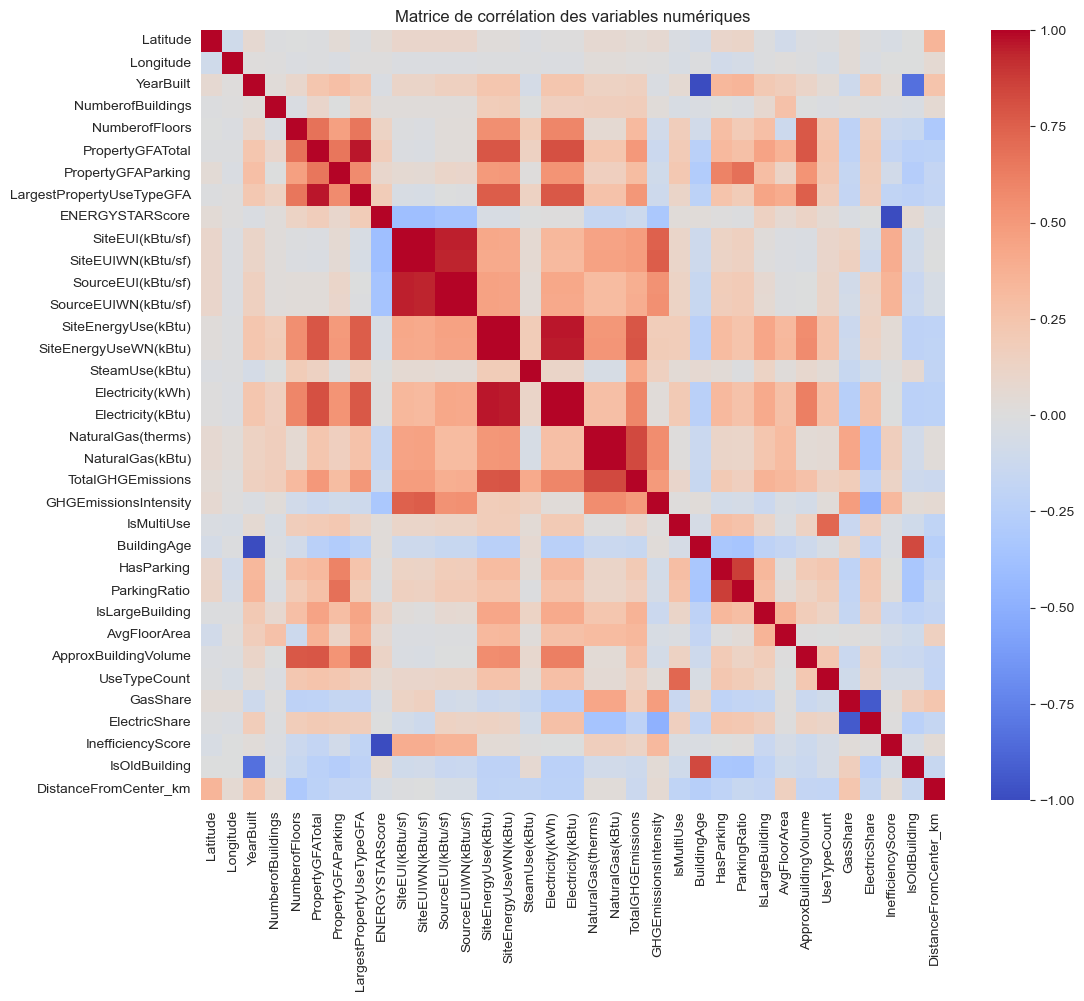

In [2061]:
corr = building_consumption.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [2062]:
print('Nombre de colonnes avant suppression des corrélations :', building_consumption.shape[1])
cols_to_drop_corr = [
    'IsLargeBuilding',         # dérivé de PropertyGFATotal
    'HasParking',              # dérivé de PropertyGFAParking
    'IsOldBuilding',           # dérivé de BuildingAge
    'SiteEUI(kBtu/sf)',        # doublon non normalisé
    'SourceEUI(kBtu/sf)',      # doublon non normalisé
    'SourceEUIWN(kBtu/sf)'     # doublon de SiteEUIWN(kBtu/sf)
]

building_consumption = building_consumption.drop(columns=cols_to_drop_corr)
print('Nombre de colonnes après suppression des corrélations :', building_consumption.shape[1])

Nombre de colonnes avant suppression des corrélations : 39
Nombre de colonnes après suppression des corrélations : 33


## 4 / Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).

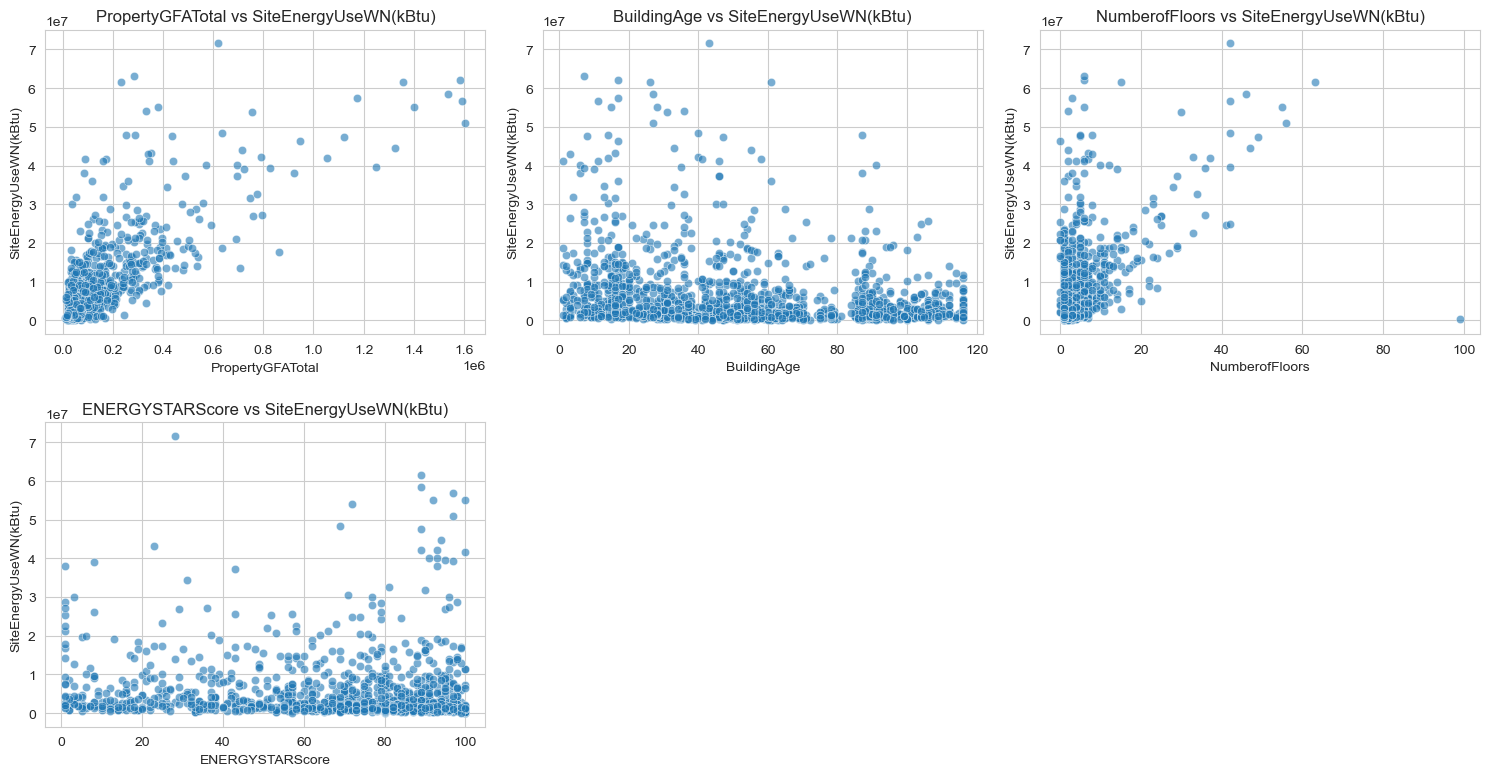

In [2063]:
features_cont = ['PropertyGFATotal', 'BuildingAge', 'NumberofFloors', 'ENERGYSTARScore']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        alpha=0.6
    )
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()

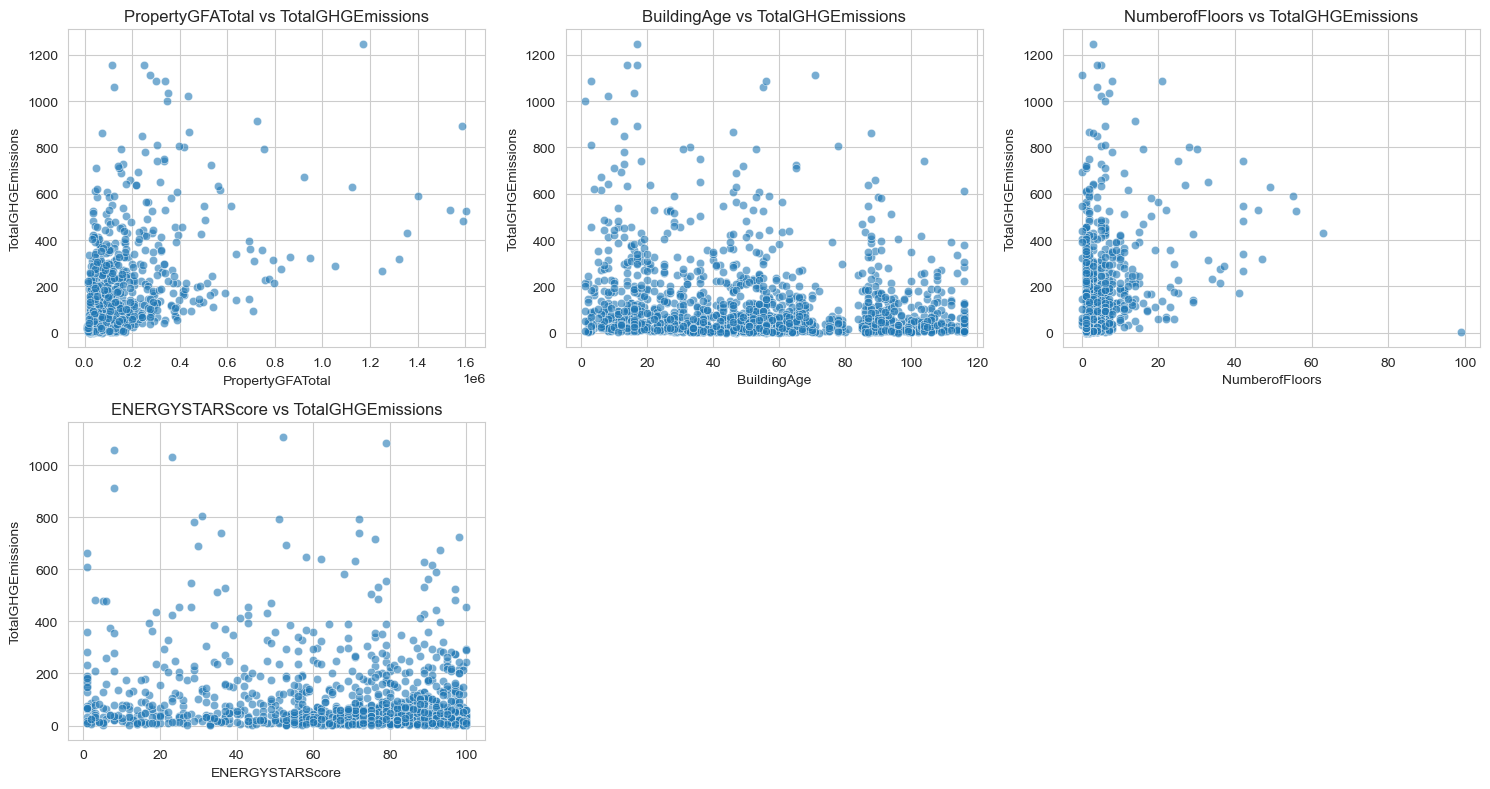

In [2064]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        alpha=0.6
    )
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()

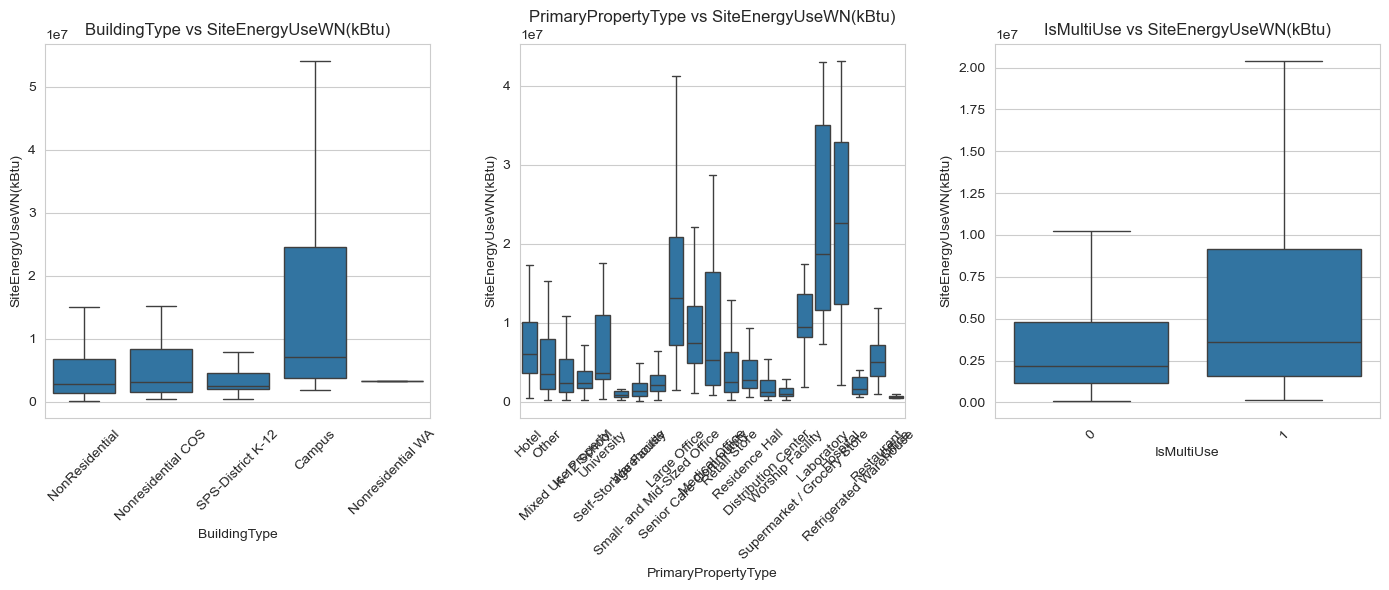

In [2065]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()


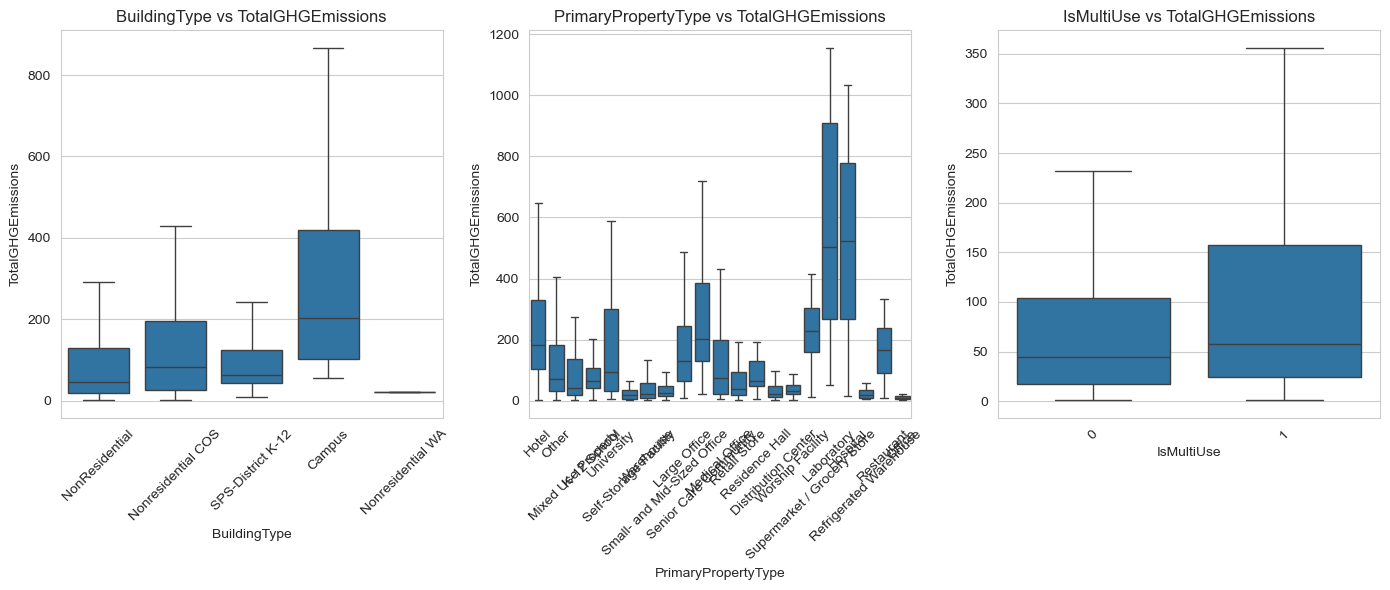

In [2066]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()


Analyse des relations entre les variables et les cibles

Des visualisations de type scatterplot (pour les variables continues) et boxplot (pour les variables catégorielles) ont permis d’analyser les liens entre les caractéristiques des bâtiments et les deux cibles :

la consommation énergétique totale (SiteEnergyUseWN(kBtu)),

et les émissions de gaz à effet de serre (TotalGHGEmissions).

Principales tendances observées :

La surface totale (PropertyGFATotal) est fortement corrélée à la consommation et aux émissions.

L’âge du bâtiment (BuildingAge) montre une légère tendance croissante, les bâtiments anciens étant globalement moins efficaces.

Le score énergétique (ENERGYSTARScore) est corrélé négativement aux deux cibles, validant sa pertinence comme indicateur d’efficacité.

Les bâtiments de type “Campus” ou “Hôpital” consomment et émettent beaucoup plus que la moyenne.

Les bâtiments à usage multiple (IsMultiUse=1) présentent également des consommations plus élevées.

## 5 & 6 / Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target). & Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [2067]:
# === DÉFINITION DES VARIABLES CIBLES ===

# Cible 1 : consommation d'énergie totale normalisée (kBtu)
y_energy = building_consumption['SiteEnergyUseWN(kBtu)']

# Cible 2 : émissions totales de CO₂ (tCO2e)
y_emissions = building_consumption['TotalGHGEmissions']


# === COLONNES À NE PAS UTILISER POUR LA PRÉDICTION ===

# Colonnes purement descriptives / identifiants (pas prédictives pour un nouveau bâtiment)
meta_cols = [
    'OSEBuildingID',
    'PropertyName',
    'Address',
    'City',
    'State',
    'ZipCode',
    'TaxParcelIdentificationNumber',
    'Neighborhood',
    'CouncilDistrictCode'
]

# Colonnes qui correspondent aux cibles ou qui en dérivent directement
leak_cols_common = [
    'SiteEnergyUseWN(kBtu)',      # cible énergie
    'TotalGHGEmissions',          # cible CO2
    'EnergyIntensity',            # = SiteEnergyUseWN / surface -> fuite directe
    'EmissionsIntensity',         # = TotalGHGEmissions / surface -> fuite directe
    'GasShare',                   # ratio basé sur SiteEnergyUseWN
    'ElectricShare'               # ratio basé sur SiteEnergyUseWN
]

# Mesures directes d'énergie consommée par type (élec, gaz, vapeur...)
# => on NE DOIT PAS les utiliser pour prédire l'énergie totale, sinon c'est triché.
direct_energy_measures = [
    'Electricity(kWh)',
    'Electricity(kBtu)',
    'NaturalGas(therms)',
    'NaturalGas(kBtu)',
    'SteamUse(kBtu)',
    'SiteEnergyUse(kBtu)',
    'SourceEUI(kBtu/sf)',
    'SourceEUIWN(kBtu/sf)',
    'SiteEUI(kBtu/sf)',
    'SiteEUIWN(kBtu/sf)'
    # ajoute ici d'autres colonnes de conso directe si tu en as
]

# === MATRICE DE FEATURES POUR LA PRÉDICTION DE LA CONSOMMATION D'ÉNERGIE ===
# Objectif : être capable de prédire la conso d'un bâtiment AVANT de connaître ses consommations mesurées.
# Donc on retire les mesures directes d'énergie.
X_energy = building_consumption.drop(
    columns = meta_cols + leak_cols_common + direct_energy_measures,
    errors='ignore'
)

# === MATRICE DE FEATURES POUR LA PRÉDICTION DES ÉMISSIONS DE CO2 ===
# Ici, prédire les émissions totales. Les émissions viennent en grande partie du mix énergétique (gaz vs élec).
# On peut donc garder les colonnes de consommation énergétique (gaz/élec/etc.) car elles CAUSENT le CO2.
# Par contre on enlève toujours la cible et ses dérivés directs.
X_emissions = building_consumption.drop(
    columns = meta_cols + leak_cols_common,
    errors='ignore'
)

# Vérification rapide
print("X_energy shape :", X_energy.shape)
print("X_emissions shape :", X_emissions.shape)
print("y_energy shape :", y_energy.shape)
print("y_emissions shape :", y_emissions.shape)


X_energy shape : (1552, 22)
X_emissions shape : (1552, 29)
y_energy shape : (1552,)
y_emissions shape : (1552,)


In [2068]:
# === IDENTIFICATION DES COLONNES CATÉGORIELLES ET NUMÉRIQUES ===

# Pour le modèle de prédiction de la consommation énergétique
cat_cols_energy = X_energy.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols_energy = X_energy.select_dtypes(include=['number']).columns.tolist()

print("Colonnes catégorielles (Energy):", cat_cols_energy)
print("Colonnes numériques (Energy):", num_cols_energy)
print(f"Nombre total de features Energy: {len(cat_cols_energy) + len(num_cols_energy)}\n")

# Pour le modèle de prédiction des émissions de CO2
cat_cols_emissions = X_emissions.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols_emissions = X_emissions.select_dtypes(include=['number']).columns.tolist()

print("Colonnes catégorielles (Emissions):", cat_cols_emissions)
print("Colonnes numériques (Emissions):", num_cols_emissions)
print(f"Nombre total de features Emissions: {len(cat_cols_emissions) + len(num_cols_emissions)}")


Colonnes catégorielles (Energy): ['BuildingType', 'PrimaryPropertyType', 'Outlier', 'BuildingAgeClass']
Colonnes numériques (Energy): ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'GHGEmissionsIntensity', 'IsMultiUse', 'BuildingAge', 'ParkingRatio', 'AvgFloorArea', 'ApproxBuildingVolume', 'UseTypeCount', 'InefficiencyScore', 'DistanceFromCenter_km']
Nombre total de features Energy: 22

Colonnes catégorielles (Emissions): ['BuildingType', 'PrimaryPropertyType', 'Outlier', 'BuildingAgeClass']
Colonnes numériques (Emissions): ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'IsMultiUs

In [2069]:
from sklearn.preprocessing import OneHotEncoder

# === 1. PRÉPARATION DES FEATURES POUR L'ÉNERGIE ===

print("=== Pipeline ENERGY ===")

# On part de X_energy
X_energy_clean = X_energy.copy()

# Colonnes catégorielles / numériques (définies plus tôt)
# cat_cols_energy, num_cols_energy

# 1A. Remplacer les valeurs manquantes dans les colonnes catégorielles par 'Unknown'
for col in cat_cols_energy:
    X_energy_clean[col] = X_energy_clean[col].fillna('Unknown')

# 1B. Encodage One-Hot sur les colonnes catégorielles
encoder_energy = OneHotEncoder(drop='first', sparse_output=False)
X_energy_encoded = encoder_energy.fit_transform(X_energy_clean[cat_cols_energy])

# Colonnes après encodage
encoded_cols_energy = encoder_energy.get_feature_names_out(cat_cols_energy)

# Recréer un DataFrame encodé avec les bons index
X_energy_encoded_df = pd.DataFrame(
    X_energy_encoded,
    columns=encoded_cols_energy,
    index=X_energy_clean.index
)

# 1C. On reconstruit la matrice finale pour l'énergie :
#    - on enlève les colonnes catégorielles brutes
#    - on ajoute les colonnes encodées
X_final_energy = pd.concat(
    [X_energy_clean.drop(columns=cat_cols_energy), X_energy_encoded_df],
    axis=1
)

# 1D. Remplacement des valeurs manquantes numériques par la moyenne
X_final_energy = X_final_energy.fillna(X_final_energy.mean(numeric_only=True))

print("X_final_energy shape :", X_final_energy.shape)
print("Nb valeurs manquantes restantes (energy) :", X_final_energy.isnull().sum().sum())


# === 2. PRÉPARATION DES FEATURES POUR LES ÉMISSIONS CO₂ ===

print("\n=== Pipeline EMISSIONS ===")

# On part de X_emissions
X_emissions_clean = X_emissions.copy()

# Colonnes catégorielles / numériques (définies plus tôt)
# cat_cols_emissions, num_cols_emissions

# 2A. Remplacer les valeurs manquantes catégorielles par 'Unknown'
for col in cat_cols_emissions:
    X_emissions_clean[col] = X_emissions_clean[col].fillna('Unknown')

# 2B. Encodage One-Hot
encoder_emissions = OneHotEncoder(drop='first', sparse_output=False)
X_emissions_encoded = encoder_emissions.fit_transform(X_emissions_clean[cat_cols_emissions])

# Colonnes après encodage
encoded_cols_emissions = encoder_emissions.get_feature_names_out(cat_cols_emissions)

X_emissions_encoded_df = pd.DataFrame(
    X_emissions_encoded,
    columns=encoded_cols_emissions,
    index=X_emissions_clean.index
)

# 2C. Reconstruction finale pour CO2
X_final_emissions = pd.concat(
    [X_emissions_clean.drop(columns=cat_cols_emissions), X_emissions_encoded_df],
    axis=1
)

# 2D. Remplacement des NaN numériques par les moyennes de colonnes
X_final_emissions = X_final_emissions.fillna(X_final_emissions.mean(numeric_only=True))

print("X_final_emissions shape :", X_final_emissions.shape)
print("Nb valeurs manquantes restantes (emissions) :", X_final_emissions.isnull().sum().sum())

# Petit aperçu
print("\nAperçu Energy :")
display(X_final_energy.head())

print("\nAperçu Emissions :")
display(X_final_emissions.head())


=== Pipeline ENERGY ===
X_final_energy shape : (1552, 46)
Nb valeurs manquantes restantes (energy) : 0

=== Pipeline EMISSIONS ===
X_final_emissions shape : (1552, 53)
Nb valeurs manquantes restantes (emissions) : 0

Aperçu Energy :


,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,ENERGYSTARScore,GHGEmissionsIntensity,...,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Outlier_Low outlier,Outlier_Unknown,BuildingAgeClass_old,BuildingAgeClass_recent
0,47.61220,-122.33799,1927,1.0,12,88434,0,88434.0,60.000000,2.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,47.61317,-122.33393,1996,1.0,11,103566,15064,83880.0,61.000000,2.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47.61412,-122.33664,1926,1.0,10,61320,0,61320.0,56.000000,4.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,47.61375,-122.34047,1980,1.0,18,175580,62000,123445.0,75.000000,2.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,47.61623,-122.33657,1999,1.0,2,97288,37198,88830.0,65.509056,3.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0



Aperçu Emissions :


,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),...,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Outlier_Low outlier,Outlier_Unknown,BuildingAgeClass_old,BuildingAgeClass_recent
0,47.61220,-122.33799,1927,1.0,12,88434,0,88434.0,60.000000,84.300003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,47.61317,-122.33393,1996,1.0,11,103566,15064,83880.0,61.000000,97.900002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47.61412,-122.33664,1926,1.0,10,61320,0,61320.0,56.000000,113.300003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,47.61375,-122.34047,1980,1.0,18,175580,62000,123445.0,75.000000,118.699997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,47.61623,-122.33657,1999,1.0,2,97288,37198,88830.0,65.509056,141.600006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Test de Skewness et Transformation Logarithmique des Variables Cibles

Avant d'entraîner nos modèles, nous allons analyser la distribution de nos variables cibles et appliquer une transformation logarithmique si nécessaire pour normaliser leur distribution.

=== ANALYSE DE LA SKEWNESS DES VARIABLES CIBLES ===
Skewness y_energy (consommation d'énergie): 3.271
Skewness y_emissions (émissions CO₂): 2.951

Interprétation:
- Skewness proche de 0: distribution normale
- Skewness > 0.5: distribution asymétrique à droite (queue à droite)
- Skewness < -0.5: distribution asymétrique à gauche (queue à gauche)
- |Skewness| > 1: distribution fortement asymétrique


/var/folders/3m/lmpnhrkx07v6nnn5lbwvr9gw0000gn/T/ipykernel_4829/1597931137.py:46: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


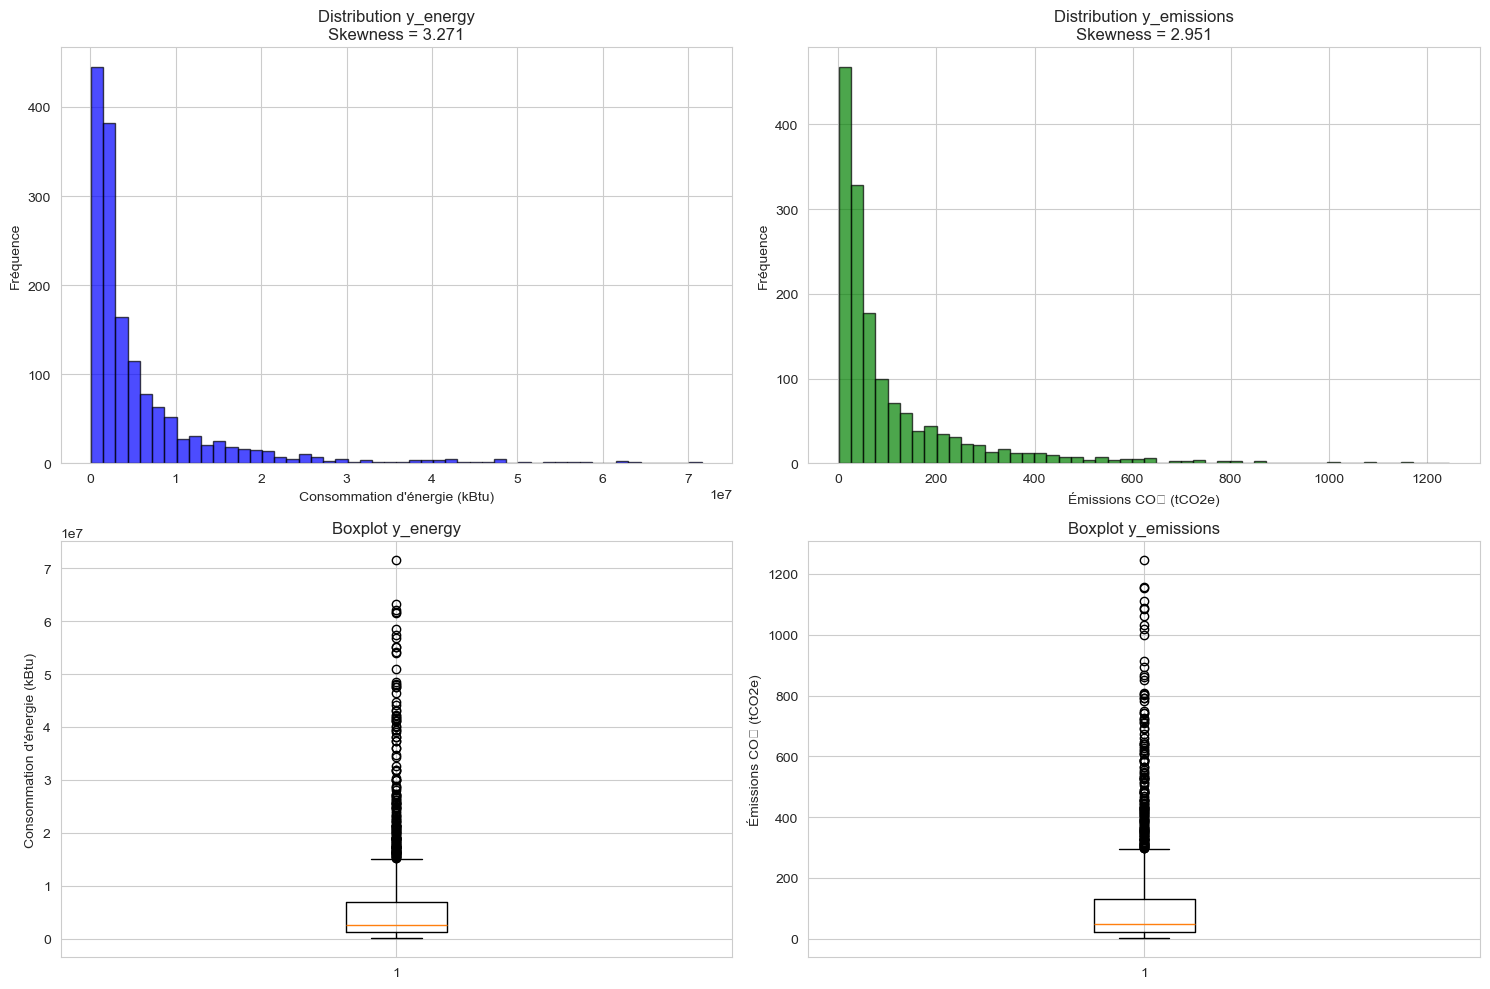


=== STATISTIQUES DESCRIPTIVES ===
y_energy:
count    1.552000e+03
mean     6.120780e+06
std      9.042853e+06
min      7.996790e+04
25%      1.338304e+06
50%      2.691883e+06
75%      6.852169e+06
max      7.156895e+07
Name: SiteEnergyUseWN(kBtu), dtype: float64

y_emissions:
count    1552.000000
mean      114.303621
std       166.352474
min         0.870000
25%        20.600000
50%        49.215000
75%       131.115000
max      1246.550000
Name: TotalGHGEmissions, dtype: float64


In [2070]:
# === 1. ANALYSE DE LA SKEWNESS DES VARIABLES CIBLES ===

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Calcul de la skewness pour les deux variables cibles
skewness_energy = skew(y_energy.dropna())
skewness_emissions = skew(y_emissions.dropna())

print("=== ANALYSE DE LA SKEWNESS DES VARIABLES CIBLES ===")
print(f"Skewness y_energy (consommation d'énergie): {skewness_energy:.3f}")
print(f"Skewness y_emissions (émissions CO₂): {skewness_emissions:.3f}")
print()
print("Interprétation:")
print("- Skewness proche de 0: distribution normale")
print("- Skewness > 0.5: distribution asymétrique à droite (queue à droite)")
print("- Skewness < -0.5: distribution asymétrique à gauche (queue à gauche)")
print("- |Skewness| > 1: distribution fortement asymétrique")

# Visualisation des distributions originales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution de y_energy
axes[0, 0].hist(y_energy.dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title(f'Distribution y_energy\nSkewness = {skewness_energy:.3f}')
axes[0, 0].set_xlabel('Consommation d\'énergie (kBtu)')
axes[0, 0].set_ylabel('Fréquence')

# Distribution de y_emissions
axes[0, 1].hist(y_emissions.dropna(), bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title(f'Distribution y_emissions\nSkewness = {skewness_emissions:.3f}')
axes[0, 1].set_xlabel('Émissions CO₂ (tCO2e)')
axes[0, 1].set_ylabel('Fréquence')

# Boxplots pour identifier les outliers
axes[1, 0].boxplot(y_energy.dropna())
axes[1, 0].set_title('Boxplot y_energy')
axes[1, 0].set_ylabel('Consommation d\'énergie (kBtu)')

axes[1, 1].boxplot(y_emissions.dropna())
axes[1, 1].set_title('Boxplot y_emissions')
axes[1, 1].set_ylabel('Émissions CO₂ (tCO2e)')

plt.tight_layout()
plt.show()

# Statistiques descriptives
print("\n=== STATISTIQUES DESCRIPTIVES ===")
print("y_energy:")
print(y_energy.describe())
print("\ny_emissions:")
print(y_emissions.describe())

=== COMPARAISON SKEWNESS AVANT/APRÈS TRANSFORMATION LOG ===
y_energy - Original: 3.271 | Log-transformé: 0.189
y_emissions - Original: 2.951 | Log-transformé: -0.049



/var/folders/3m/lmpnhrkx07v6nnn5lbwvr9gw0000gn/T/ipykernel_4829/2165357747.py:58: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


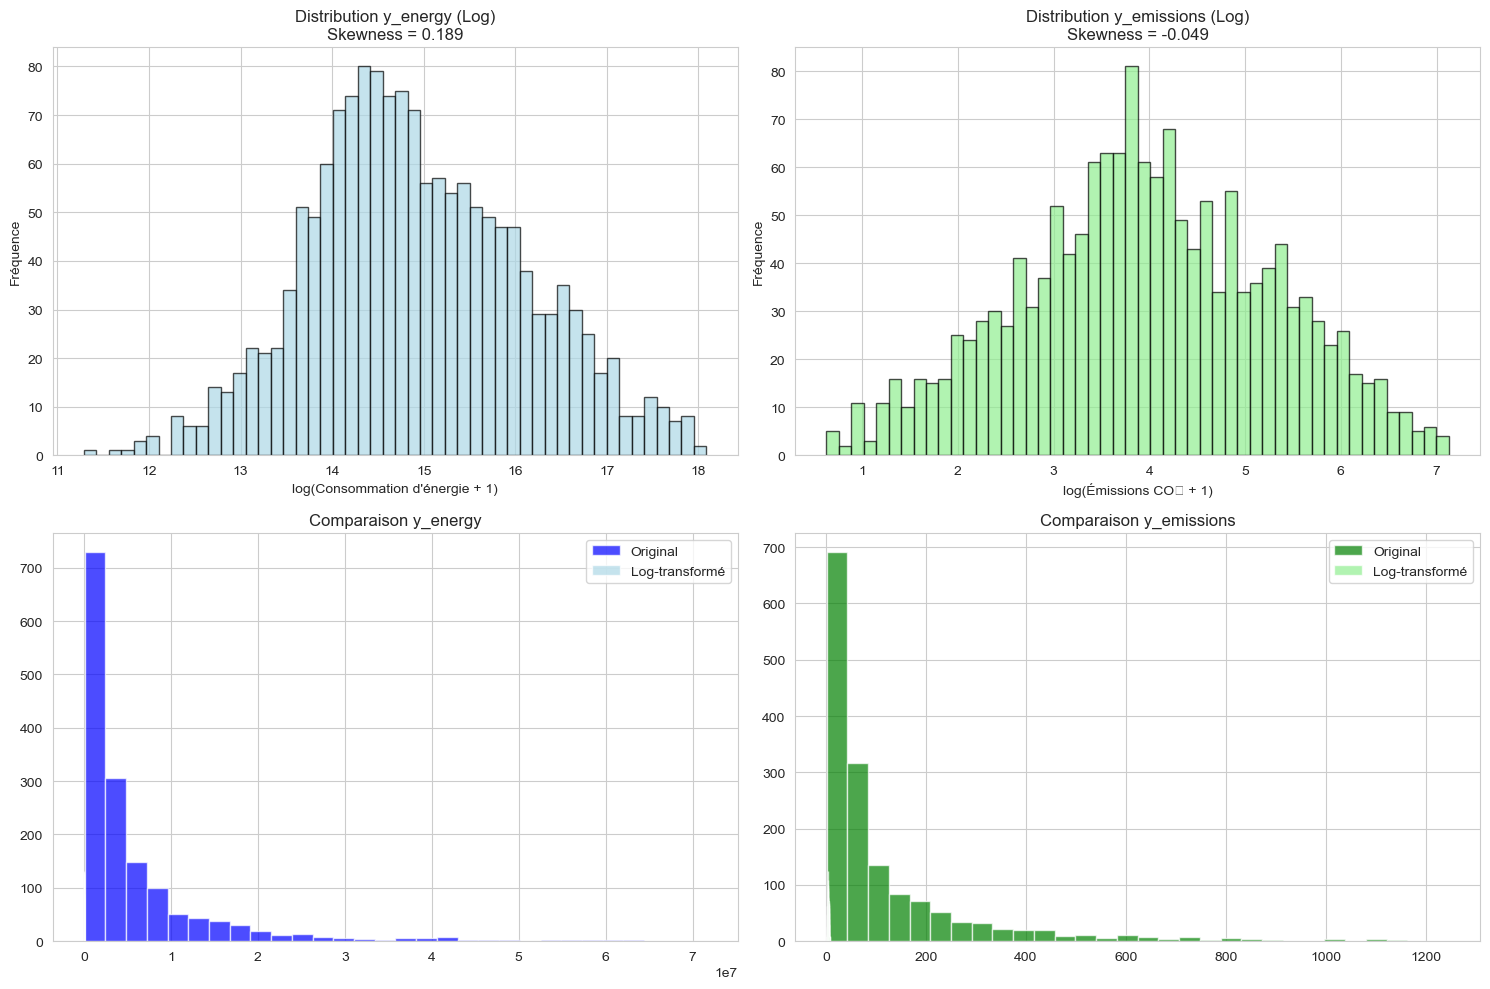


=== VÉRIFICATION DE LA TRANSFORMATION INVERSE ===
Différence maximale y_energy (original vs. log->inverse): 0.0000001043
Différence maximale y_emissions (original vs. log->inverse): 0.0000000000
⚠ Problème avec la transformation inverse


In [2071]:
# === 2. TRANSFORMATION LOGARITHMIQUE DES VARIABLES CIBLES ===

# Fonction pour appliquer la transformation log(x+1) en sécurité
def log_transform(y):
    """
    Applique la transformation log(x+1) pour normaliser la distribution
    log(x+1) est utilisé pour éviter log(0) si certaines valeurs sont nulles
    """
    return np.log1p(y)  # log1p(x) = log(1+x), plus stable numériquement

# Fonction pour la transformation inverse exp(x)-1
def inverse_log_transform(y_log):
    """
    Applique la transformation inverse: exp(x)-1 pour revenir à l'échelle originale
    """
    return np.expm1(y_log)  # expm1(x) = exp(x)-1, plus stable numériquement

# Application des transformations logarithmiques
y_energy_log = log_transform(y_energy)
y_emissions_log = log_transform(y_emissions)

# Calcul de la skewness après transformation
skewness_energy_log = skew(y_energy_log.dropna())
skewness_emissions_log = skew(y_emissions_log.dropna())

print("=== COMPARAISON SKEWNESS AVANT/APRÈS TRANSFORMATION LOG ===")
print(f"y_energy - Original: {skewness_energy:.3f} | Log-transformé: {skewness_energy_log:.3f}")
print(f"y_emissions - Original: {skewness_emissions:.3f} | Log-transformé: {skewness_emissions_log:.3f}")
print()

# Visualisation des distributions après transformation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution de y_energy log-transformé
axes[0, 0].hist(y_energy_log.dropna(), bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title(f'Distribution y_energy (Log)\nSkewness = {skewness_energy_log:.3f}')
axes[0, 0].set_xlabel('log(Consommation d\'énergie + 1)')
axes[0, 0].set_ylabel('Fréquence')

# Distribution de y_emissions log-transformé
axes[0, 1].hist(y_emissions_log.dropna(), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title(f'Distribution y_emissions (Log)\nSkewness = {skewness_emissions_log:.3f}')
axes[0, 1].set_xlabel('log(Émissions CO₂ + 1)')
axes[0, 1].set_ylabel('Fréquence')

# Comparaison avant/après pour y_energy
axes[1, 0].hist(y_energy.dropna(), bins=30, alpha=0.7, color='blue', label='Original')
axes[1, 0].hist(y_energy_log.dropna(), bins=30, alpha=0.7, color='lightblue', label='Log-transformé')
axes[1, 0].set_title('Comparaison y_energy')
axes[1, 0].legend()

# Comparaison avant/après pour y_emissions
axes[1, 1].hist(y_emissions.dropna(), bins=30, alpha=0.7, color='green', label='Original')
axes[1, 1].hist(y_emissions_log.dropna(), bins=30, alpha=0.7, color='lightgreen', label='Log-transformé')
axes[1, 1].set_title('Comparaison y_emissions')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Test de la transformation inverse pour vérifier qu'elle fonctionne
print("\n=== VÉRIFICATION DE LA TRANSFORMATION INVERSE ===")
y_energy_reconstructed = inverse_log_transform(y_energy_log)
y_emissions_reconstructed = inverse_log_transform(y_emissions_log)

# Vérification que la transformation inverse fonctionne (doit être quasi-égal aux valeurs originales)
energy_diff = np.abs(y_energy - y_energy_reconstructed).max()
emissions_diff = np.abs(y_emissions - y_emissions_reconstructed).max()

print(f"Différence maximale y_energy (original vs. log->inverse): {energy_diff:.10f}")
print(f"Différence maximale y_emissions (original vs. log->inverse): {emissions_diff:.10f}")
print("✓ Transformation inverse validée !" if energy_diff < 1e-10 and emissions_diff < 1e-10 else "⚠ Problème avec la transformation inverse")

## Entraînement des Modèles avec Variables Cibles Log-Transformées

Nous allons maintenant entraîner nos modèles en utilisant les variables cibles transformées avec log(x+1), puis appliquer la transformation inverse sur les prédictions pour évaluer les performances sur l'échelle originale.

In [2072]:
# === 3. PRÉPARATION DES DONNÉES AVEC TARGETS LOG-TRANSFORMÉES ===

# Division train/test avec les targets log-transformées
from sklearn.model_selection import train_test_split

# Utilisation des mêmes indices pour garantir la cohérence
# On va garder la même logique que dans le notebook original
y_energy_log_train = y_energy_log.loc[train_idx]
y_energy_log_test = y_energy_log.loc[test_idx]

y_emissions_log_train = y_emissions_log.loc[train_idx]
y_emissions_log_test = y_emissions_log.loc[test_idx]

print("=== DONNÉES AVEC TARGETS LOG-TRANSFORMÉES ===")
print(f"y_energy_log_train shape: {y_energy_log_train.shape}")
print(f"y_energy_log_test shape: {y_energy_log_test.shape}")
print(f"y_emissions_log_train shape: {y_emissions_log_train.shape}")
print(f"y_emissions_log_test shape: {y_emissions_log_test.shape}")

# Fonction d'évaluation modifiée pour gérer la transformation inverse
def evaluate_model_with_log_transform(model, X_train, X_test, y_train_log, y_test_log, 
                                     y_train_original, y_test_original, model_name, target_name):
    """
    Entraîne un modèle sur les targets log-transformées,
    applique la transformation inverse aux prédictions,
    et évalue sur l'échelle originale.
    """
    # Entraînement sur les targets log-transformées
    model.fit(X_train, y_train_log)
    
    # Prédictions sur l'échelle log
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    
    # Transformation inverse pour revenir à l'échelle originale
    y_train_pred_original = inverse_log_transform(y_train_pred_log)
    y_test_pred_original = inverse_log_transform(y_test_pred_log)
    
    # Métriques sur l'échelle originale
    metrics = {
        'model': model_name,
        'target': target_name,
        'transformation': 'log',
        'r2_train': r2_score(y_train_original, y_train_pred_original),
        'r2_test': r2_score(y_test_original, y_test_pred_original),
        'mae_train': mean_absolute_error(y_train_original, y_train_pred_original),
        'mae_test': mean_absolute_error(y_test_original, y_test_pred_original),
        'rmse_train': np.sqrt(mean_squared_error(y_train_original, y_train_pred_original)),
        'rmse_test': np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))
    }
    
    return metrics, model

=== DONNÉES AVEC TARGETS LOG-TRANSFORMÉES ===
y_energy_log_train shape: (1241,)
y_energy_log_test shape: (311,)
y_emissions_log_train shape: (1241,)
y_emissions_log_test shape: (311,)


In [2090]:
# === 4. ENTRAÎNEMENT DES MODÈLES AVEC TARGETS LOG-TRANSFORMÉES ===
import lightgbm as lgb
print("=== PRÉDICTION DE LA CONSOMMATION ÉNERGÉTIQUE (LOG-TRANSFORMÉE) ===\n")

# Définition des modèles à tester (même liste que dans l'original)
models_energy_log = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbosity=-1),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

results_energy_log = []
trained_models_energy_log = {}

for name, model in models_energy_log.items():
    print(f"Entraînement du modèle: {name}")
    
    # Modèles qui nécessitent du scaling
    if name in ['Régression Linéaire', 'SVR']:
        metrics, trained_model = evaluate_model_with_log_transform(
            model,
            X_train_energy_scaled,
            X_test_energy_scaled,
            y_energy_log_train,
            y_energy_log_test,
            y_train_energy,  # targets originales pour l'évaluation
            y_test_energy,
            name,
            'Energy (Log-transformed)'
        )
    else:
        # Modèles qui n'ont pas besoin de scaling
        metrics, trained_model = evaluate_model_with_log_transform(
            model,
            X_train_energy,
            X_test_energy,
            y_energy_log_train,
            y_energy_log_test,
            y_train_energy,
            y_test_energy,
            name,
            'Energy (Log-transformed)'
        )
    
    results_energy_log.append(metrics)
    trained_models_energy_log[name] = trained_model
    
    print(f"  R² Test: {metrics['r2_test']:.4f}")
    print(f"  MAE Test: {metrics['mae_test']:.2f}")
    print(f"  RMSE Test: {metrics['rmse_test']:.2f}")
    print()

print("=== PRÉDICTION DES ÉMISSIONS CO₂ (LOG-TRANSFORMÉE) ===\n")

models_emissions_log = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbosity=-1),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

results_emissions_log = []
trained_models_emissions_log = {}

for name, model in models_emissions_log.items():
    print(f"Entraînement du modèle: {name}")
    
    # Modèles qui nécessitent du scaling
    if name in ['Régression Linéaire', 'SVR']:
        metrics, trained_model = evaluate_model_with_log_transform(
            model,
            X_train_emis_scaled,
            X_test_emis_scaled,
            y_emissions_log_train,
            y_emissions_log_test,
            y_train_emis,  # targets originales pour l'évaluation
            y_test_emis,
            name,
            'Emissions (Log-transformed)'
        )
    else:
        # Modèles qui n'ont pas besoin de scaling
        metrics, trained_model = evaluate_model_with_log_transform(
            model,
            X_train_emis,
            X_test_emis,
            y_emissions_log_train,
            y_emissions_log_test,
            y_train_emis,
            y_test_emis,
            name,
            'Emissions (Log-transformed)'
        )
    
    results_emissions_log.append(metrics)
    trained_models_emissions_log[name] = trained_model
    
    print(f"  R² Test: {metrics['r2_test']:.4f}")
    print(f"  MAE Test: {metrics['mae_test']:.2f}")
    print(f"  RMSE Test: {metrics['rmse_test']:.2f}")
    print()

=== PRÉDICTION DE LA CONSOMMATION ÉNERGÉTIQUE (LOG-TRANSFORMÉE) ===

Entraînement du modèle: Baseline (DummyRegressor)
  R² Test: -0.1051
  MAE Test: 5083259.73
  RMSE Test: 10997857.63

Entraînement du modèle: Régression Linéaire
  R² Test: -3801.3296
  MAE Test: 39561262.60
  RMSE Test: 645100446.77

Entraînement du modèle: Random Forest
  R² Test: 0.8251
  MAE Test: 1684405.42
  RMSE Test: 4375273.33

Entraînement du modèle: LightGBM
  R² Test: 0.8173
  MAE Test: 1679586.22
  RMSE Test: 4471884.85

Entraînement du modèle: SVR
  R² Test: 0.8251
  MAE Test: 1684405.42
  RMSE Test: 4375273.33

Entraînement du modèle: LightGBM
  R² Test: 0.8173
  MAE Test: 1679586.22
  RMSE Test: 4471884.85

Entraînement du modèle: SVR
  R² Test: 0.4600
  MAE Test: 2430068.00
  RMSE Test: 7687981.06

=== PRÉDICTION DES ÉMISSIONS CO₂ (LOG-TRANSFORMÉE) ===

Entraînement du modèle: Baseline (DummyRegressor)
  R² Test: -0.1245
  MAE Test: 86.71
  RMSE Test: 168.50

Entraînement du modèle: Régression Linéair

In [2095]:
# === 5. COMPARAISON DES PERFORMANCES AVANT/APRÈS TRANSFORMATION LOG ===

import pandas as pd

# Création des DataFrames de résultats pour comparaison
df_results_energy_log = pd.DataFrame(results_energy_log)
df_results_emissions_log = pd.DataFrame(results_emissions_log)

print("=== RÉSULTATS AVEC TRANSFORMATION LOGARITHMIQUE ===")
print("Consommation d'énergie (avec transformation log):")
print(df_results_energy_log[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))
print()
print("Émissions CO₂ (avec transformation log):")
print(df_results_emissions_log[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))
print()

# Comparaison avec les résultats originaux (si disponibles)
if 'df_results_energy' in globals():
    print("=== COMPARAISON ÉNERGIE : ORIGINAL vs LOG-TRANSFORMÉ ===")
    
    # Créer un DataFrame de comparaison
    comparison_energy = pd.merge(
        df_results_energy[['model', 'r2_test', 'mae_test', 'rmse_test']].add_suffix('_original'),
        df_results_energy_log[['model', 'r2_test', 'mae_test', 'rmse_test']].add_suffix('_log'),
        left_on='model_original',
        right_on='model_log',
        how='inner'
    )
    
    # Calculer les améliorations
    comparison_energy['r2_improvement'] = comparison_energy['r2_test_log'] - comparison_energy['r2_test_original']
    comparison_energy['mae_improvement'] = comparison_energy['mae_test_original'] - comparison_energy['mae_test_log']  # Plus faible est mieux
    comparison_energy['rmse_improvement'] = comparison_energy['rmse_test_original'] - comparison_energy['rmse_test_log']  # Plus faible est mieux
    
    print("Comparaison détaillée (amélioration = log - original pour R², original - log pour MAE/RMSE):")
    comparison_cols = ['model_original', 'r2_test_original', 'r2_test_log', 'r2_improvement',
                      'mae_test_original', 'mae_test_log', 'mae_improvement',
                      'rmse_test_original', 'rmse_test_log', 'rmse_improvement']
    print(comparison_energy[comparison_cols].round(4))
    print()

if 'df_results_emissions' in globals():
    print("=== COMPARAISON ÉMISSIONS : ORIGINAL vs LOG-TRANSFORMÉ ===")
    
    # Créer un DataFrame de comparaison
    comparison_emissions = pd.merge(
        df_results_emissions[['model', 'r2_test', 'mae_test', 'rmse_test']].add_suffix('_original'),
        df_results_emissions_log[['model', 'r2_test', 'mae_test', 'rmse_test']].add_suffix('_log'),
        left_on='model_original',
        right_on='model_log',
        how='inner'
    )
    
    # Calculer les améliorations
    comparison_emissions['r2_improvement'] = comparison_emissions['r2_test_log'] - comparison_emissions['r2_test_original']
    comparison_emissions['mae_improvement'] = comparison_emissions['mae_test_original'] - comparison_emissions['mae_test_log']
    comparison_emissions['rmse_improvement'] = comparison_emissions['rmse_test_original'] - comparison_emissions['rmse_test_log']
    
    print("Comparaison détaillée (amélioration = log - original pour R², original - log pour MAE/RMSE):")
    comparison_cols = ['model_original', 'r2_test_original', 'r2_test_log', 'r2_improvement',
                      'mae_test_original', 'mae_test_log', 'mae_improvement',
                      'rmse_test_original', 'rmse_test_log', 'rmse_improvement']
    print(comparison_emissions[comparison_cols].round(4))
    print()

# Identification des meilleurs modèles
best_energy_log = df_results_energy_log.loc[df_results_energy_log['r2_test'].idxmax()]
best_emissions_log = df_results_emissions_log.loc[df_results_emissions_log['r2_test'].idxmax()]

print("=== MEILLEURS MODÈLES AVEC TRANSFORMATION LOG ===")
print(f"Meilleur modèle Énergie: {best_energy_log['model']} (R² = {best_energy_log['r2_test']:.4f})")
print(f"Meilleur modèle Émissions: {best_emissions_log['model']} (R² = {best_emissions_log['r2_test']:.4f})")

=== RÉSULTATS AVEC TRANSFORMATION LOGARITHMIQUE ===
Consommation d'énergie (avec transformation log):
                       model    r2_test      mae_test     rmse_test
0  Baseline (DummyRegressor)    -0.1051  5.083260e+06  1.099786e+07
1        Régression Linéaire -3801.3296  3.956126e+07  6.451004e+08
2              Random Forest     0.8251  1.684405e+06  4.375273e+06
3                   LightGBM     0.8173  1.679586e+06  4.471885e+06
4                        SVR     0.4600  2.430068e+06  7.687981e+06

Émissions CO₂ (avec transformation log):
                       model   r2_test  mae_test  rmse_test
0  Baseline (DummyRegressor)   -0.1245   86.7147   168.5021
1        Régression Linéaire -233.4436  216.5568  2433.0311
2              Random Forest    0.9604    8.1645    31.6298
3                   LightGBM    0.9768    7.4590    24.2086
4                        SVR    0.7013   33.1684    86.8448

=== COMPARAISON ÉNERGIE : ORIGINAL vs LOG-TRANSFORMÉ ===
Comparaison détaillée (amélior

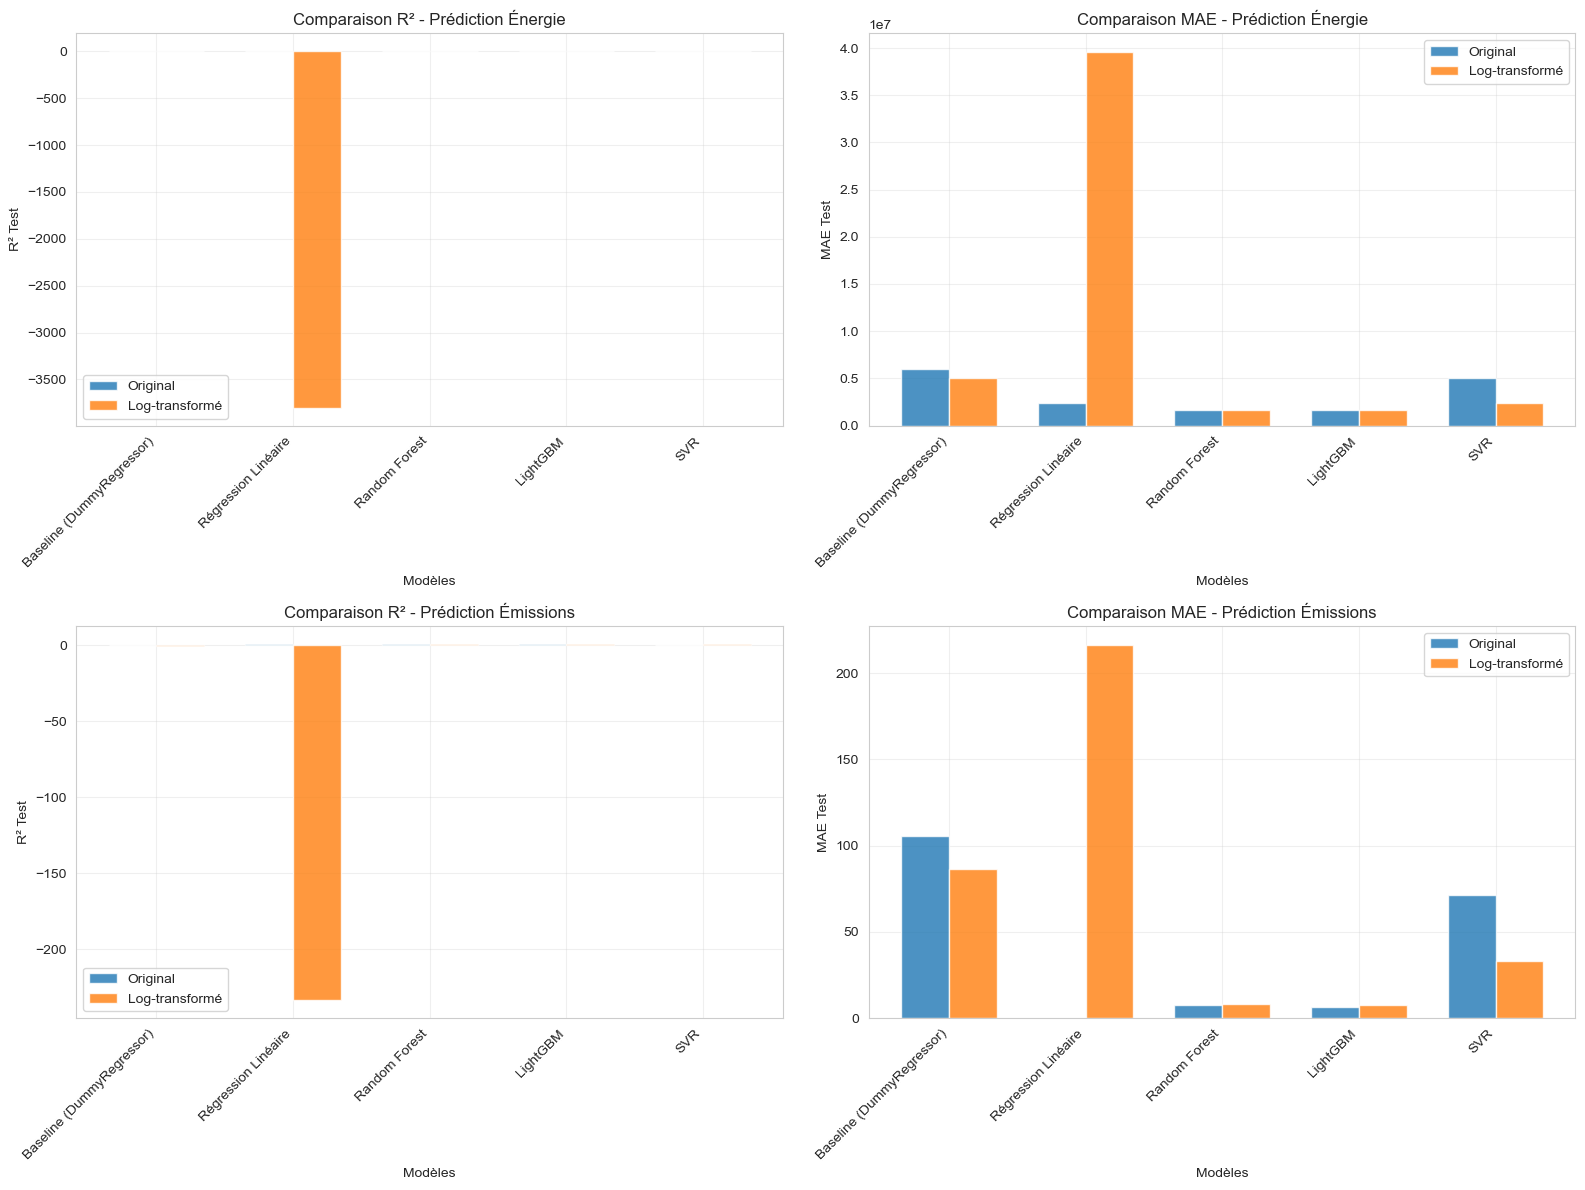

In [2096]:
# === 6. VISUALISATION DE L'IMPACT DE LA TRANSFORMATION LOGARITHMIQUE ===

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Comparaison des R² pour l'énergie
if 'df_results_energy' in globals():
    models = df_results_energy['model'].tolist()
    r2_original_energy = df_results_energy['r2_test'].tolist()
    r2_log_energy = df_results_energy_log['r2_test'].tolist()
    
    x = np.arange(len(models))
    width = 0.35
    
    axes[0, 0].bar(x - width/2, r2_original_energy, width, label='Original', alpha=0.8)
    axes[0, 0].bar(x + width/2, r2_log_energy, width, label='Log-transformé', alpha=0.8)
    axes[0, 0].set_xlabel('Modèles')
    axes[0, 0].set_ylabel('R² Test')
    axes[0, 0].set_title('Comparaison R² - Prédiction Énergie')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

# Comparaison des MAE pour l'énergie
if 'df_results_energy' in globals():
    mae_original_energy = df_results_energy['mae_test'].tolist()
    mae_log_energy = df_results_energy_log['mae_test'].tolist()
    
    axes[0, 1].bar(x - width/2, mae_original_energy, width, label='Original', alpha=0.8)
    axes[0, 1].bar(x + width/2, mae_log_energy, width, label='Log-transformé', alpha=0.8)
    axes[0, 1].set_xlabel('Modèles')
    axes[0, 1].set_ylabel('MAE Test')
    axes[0, 1].set_title('Comparaison MAE - Prédiction Énergie')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# Comparaison des R² pour les émissions
if 'df_results_emissions' in globals():
    models_em = df_results_emissions['model'].tolist()
    r2_original_emissions = df_results_emissions['r2_test'].tolist()
    r2_log_emissions = df_results_emissions_log['r2_test'].tolist()
    
    x_em = np.arange(len(models_em))
    
    axes[1, 0].bar(x_em - width/2, r2_original_emissions, width, label='Original', alpha=0.8)
    axes[1, 0].bar(x_em + width/2, r2_log_emissions, width, label='Log-transformé', alpha=0.8)
    axes[1, 0].set_xlabel('Modèles')
    axes[1, 0].set_ylabel('R² Test')
    axes[1, 0].set_title('Comparaison R² - Prédiction Émissions')
    axes[1, 0].set_xticks(x_em)
    axes[1, 0].set_xticklabels(models_em, rotation=45, ha='right')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Comparaison des MAE pour les émissions
if 'df_results_emissions' in globals():
    mae_original_emissions = df_results_emissions['mae_test'].tolist()
    mae_log_emissions = df_results_emissions_log['mae_test'].tolist()
    
    axes[1, 1].bar(x_em - width/2, mae_original_emissions, width, label='Original', alpha=0.8)
    axes[1, 1].bar(x_em + width/2, mae_log_emissions, width, label='Log-transformé', alpha=0.8)
    axes[1, 1].set_xlabel('Modèles')
    axes[1, 1].set_ylabel('MAE Test')
    axes[1, 1].set_title('Comparaison MAE - Prédiction Émissions')
    axes[1, 1].set_xticks(x_em)
    axes[1, 1].set_xticklabels(models_em, rotation=45, ha='right')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Conclusions sur l'Impact de la Transformation Logarithmique

#### Résumé des transformations appliquées :

1. **Test de Skewness** : Analyse de l'asymétrie des distributions des variables cibles
2. **Transformation Log** : Application de `log(x+1)` aux variables cibles pour normaliser leur distribution
3. **Entraînement** : Modèles entraînés sur les targets log-transformées
4. **Transformation Inverse** : Application de `exp(x)-1` aux prédictions pour revenir à l'échelle originale
5. **Évaluation** : Métriques calculées sur l'échelle originale pour comparaison

#### Points clés à retenir :

- **Normalisation des distributions** : La transformation logarithmique réduit l'asymétrie (skewness) des variables cibles
- **Impact sur les performances** : L'effet varie selon les modèles et les variables cibles
- **Stabilité numérique** : Utilisation de `log1p()` et `expm1()` pour éviter les problèmes numériques
- **Évaluation cohérente** : Toutes les métriques sont calculées sur l'échelle originale pour une comparaison juste

Cette approche permet d'améliorer la capacité des modèles à capturer les relations dans les données tout en maintenant l'interprétabilité des résultats.

## Interprétabilité des Modèles avec SHAP (SHapley Additive exPlanations)

### Analyse de l'interprétabilité locale avec les valeurs SHAP

SHAP (SHapley Additive exPlanations) est une méthode d'interprétabilité qui explique les prédictions de tout modèle de machine learning en calculant la contribution de chaque feature à une prédiction spécifique.

**Avantages de SHAP :**
- **Interprétabilité locale** : Explique chaque prédiction individuellement
- **Consistance** : Basé sur la théorie des jeux (valeurs de Shapley)
- **Efficacité** : Calcule l'importance des features de manière cohérente
- **Universalité** : Fonctionne avec tous types de modèles ML

In [ ]:
# === 1. ANALYSE SHAP POUR LES MEILLEURS MODÈLES ===
 import shap
shap.initjs()
# Sélection des meilleurs modèles pour l'analyse SHAP
print("=== SÉLECTION DES MEILLEURS MODÈLES POUR L'ANALYSE SHAP ===")

# Meilleur modèle pour l'énergie : LightGBM ou Random Forest
best_energy_model_name = df_results_energy_log.loc[df_results_energy_log['r2_test'].idxmax(), 'model']
best_energy_model = trained_models_energy_log[best_energy_model_name]

# Meilleur modèle pour les émissions : LightGBM
best_emissions_model_name = df_results_emissions_log.loc[df_results_emissions_log['r2_test'].idxmax(), 'model']
best_emissions_model = trained_models_emissions_log[best_emissions_model_name]

print(f"Meilleur modèle Énergie : {best_energy_model_name}")
print(f"Meilleur modèle Émissions : {best_emissions_model_name}")

# Sélection d'un échantillon pour l'analyse SHAP (plus rapide)
sample_size = min(100, len(X_test_energy))  # 100 échantillons max pour la rapidité
X_test_energy_sample = X_test_energy.sample(n=sample_size, random_state=42)
X_test_emis_sample = X_test_emis.sample(n=sample_size, random_state=42)

print(f"Échantillon pour SHAP : {sample_size} observations")

=== SÉLECTION DES MEILLEURS MODÈLES POUR L'ANALYSE SHAP ===
Meilleur modèle Énergie : Random Forest
Meilleur modèle Émissions : LightGBM
Échantillon pour SHAP : 100 observations


In [2099]:
# === 2. ANALYSE SHAP POUR LA PRÉDICTION D'ÉNERGIE (RANDOM FOREST) ===

print("=== ANALYSE SHAP - PRÉDICTION D'ÉNERGIE ===")
print(f"Modèle analysé : {best_energy_model_name}")

# Création de l'explainer SHAP pour Random Forest
# TreeExplainer est optimisé pour les modèles basés sur les arbres
explainer_energy = shap.TreeExplainer(best_energy_model)

# Calcul des valeurs SHAP pour l'échantillon de test
print("Calcul des valeurs SHAP pour la prédiction d'énergie...")
shap_values_energy = explainer_energy.shap_values(X_test_energy_sample)

print(f"✅ Valeurs SHAP calculées pour {len(X_test_energy_sample)} observations")
print(f"Forme des valeurs SHAP : {shap_values_energy.shape}")

=== ANALYSE SHAP - PRÉDICTION D'ÉNERGIE ===
Modèle analysé : Random Forest
Calcul des valeurs SHAP pour la prédiction d'énergie...
✅ Valeurs SHAP calculées pour 100 observations
Forme des valeurs SHAP : (100, 46)


=== VISUALISATIONS SHAP - PRÉDICTION D'ÉNERGIE ===
1. Summary Plot - Importance globale des features


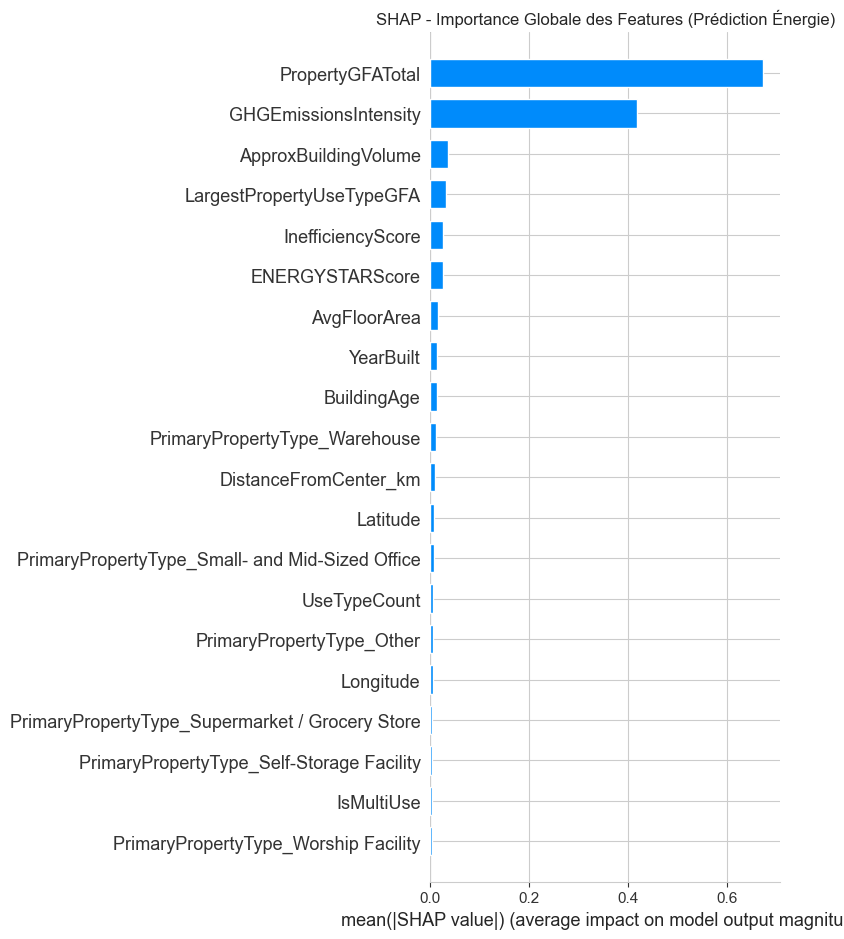


2. Summary Plot détaillé - Impact et distribution


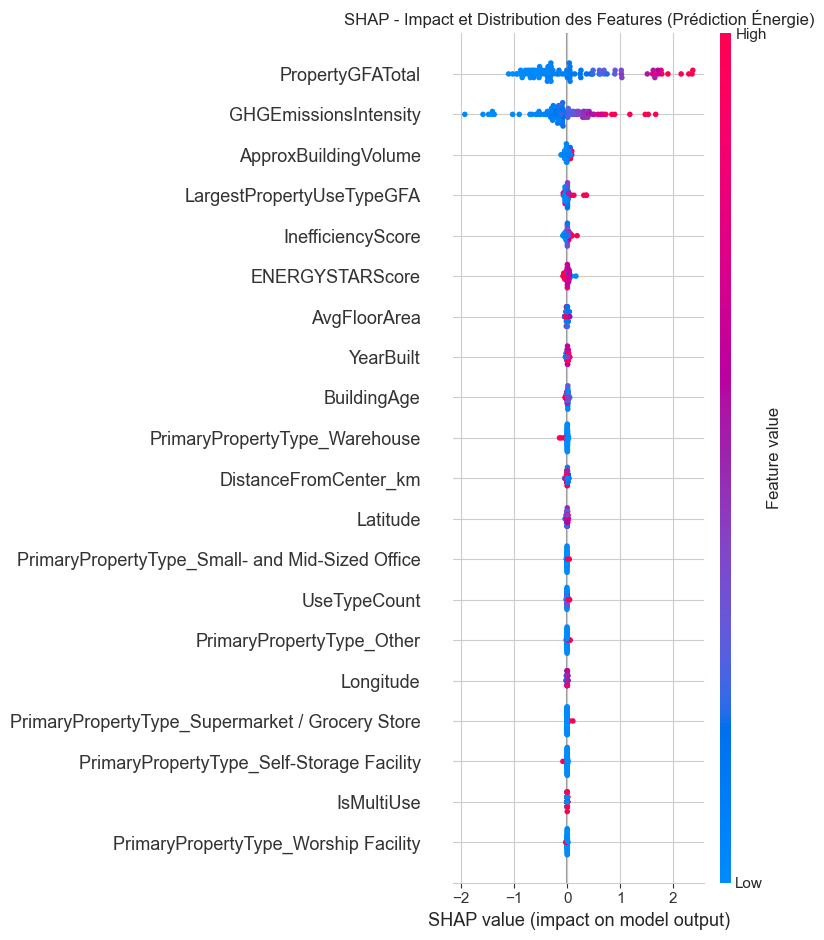


3. Analyse d'une prédiction spécifique (interprétabilité locale)
Analyse de l'observation n°0


<Figure size 1400x600 with 0 Axes>

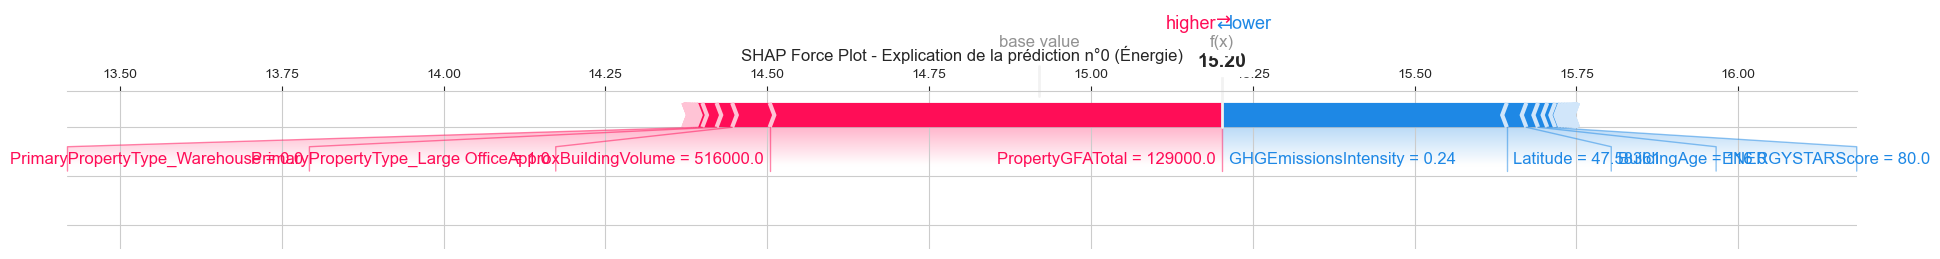


4. Top 10 des features les plus importantes (valeurs SHAP moyennes)
                          Feature  Importance_SHAP
5                PropertyGFATotal           0.6738
9           GHGEmissionsIntensity           0.4182
14           ApproxBuildingVolume           0.0347
7       LargestPropertyUseTypeGFA           0.0320
16              InefficiencyScore           0.0250
8                 ENERGYSTARScore           0.0249
13                   AvgFloorArea           0.0146
2                       YearBuilt           0.0131
11                    BuildingAge           0.0128
40  PrimaryPropertyType_Warehouse           0.0105


In [2101]:
# === 3. VISUALISATIONS SHAP POUR LA PRÉDICTION D'ÉNERGIE ===

print("=== VISUALISATIONS SHAP - PRÉDICTION D'ÉNERGIE ===")

# 1. Summary Plot : Importance globale des features
print("1. Summary Plot - Importance globale des features")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_energy, X_test_energy_sample, plot_type="bar", show=False)
plt.title('SHAP - Importance Globale des Features (Prédiction Énergie)')
plt.tight_layout()
plt.show()

# 2. Summary Plot détaillé : Impact et distribution des valeurs
print("\n2. Summary Plot détaillé - Impact et distribution")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_energy, X_test_energy_sample, show=False)
plt.title('SHAP - Impact et Distribution des Features (Prédiction Énergie)')
plt.tight_layout()
plt.show()

# 3. Analyse d'une prédiction spécifique (interprétabilité locale)
print("\n3. Analyse d'une prédiction spécifique (interprétabilité locale)")
sample_idx = 0  # Premier échantillon
print(f"Analyse de l'observation n°{sample_idx}")

# Force plot pour une observation spécifique
plt.figure(figsize=(14, 6))
shap.force_plot(explainer_energy.expected_value, 
                shap_values_energy[sample_idx], 
                X_test_energy_sample.iloc[sample_idx], 
                matplotlib=True, show=False)
plt.title(f'SHAP Force Plot - Explication de la prédiction n°{sample_idx} (Énergie)')
plt.tight_layout()
plt.show()

# 4. Feature importance moyenne
print("\n4. Top 10 des features les plus importantes (valeurs SHAP moyennes)")
feature_importance = np.abs(shap_values_energy).mean(0)
feature_names = X_test_energy_sample.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_SHAP': feature_importance
}).sort_values('Importance_SHAP', ascending=False)

print(importance_df.head(10).round(4))

=== ANALYSE SHAP - LIGHTGBM ÉMISSIONS ===
Échantillon analysé: 100 observations
Shape des valeurs SHAP: (100, 53)
Nombre de features: 53

1. Summary Plot - Importance globale des features


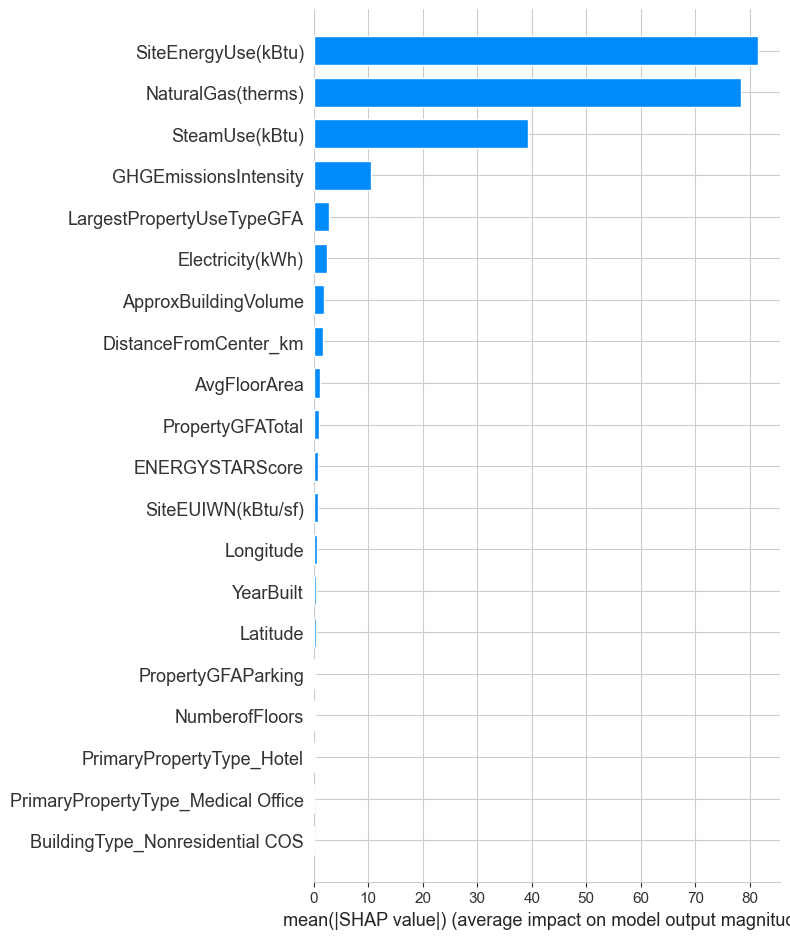

<Figure size 640x480 with 0 Axes>


2. Summary Plot détaillé - Impact et distribution


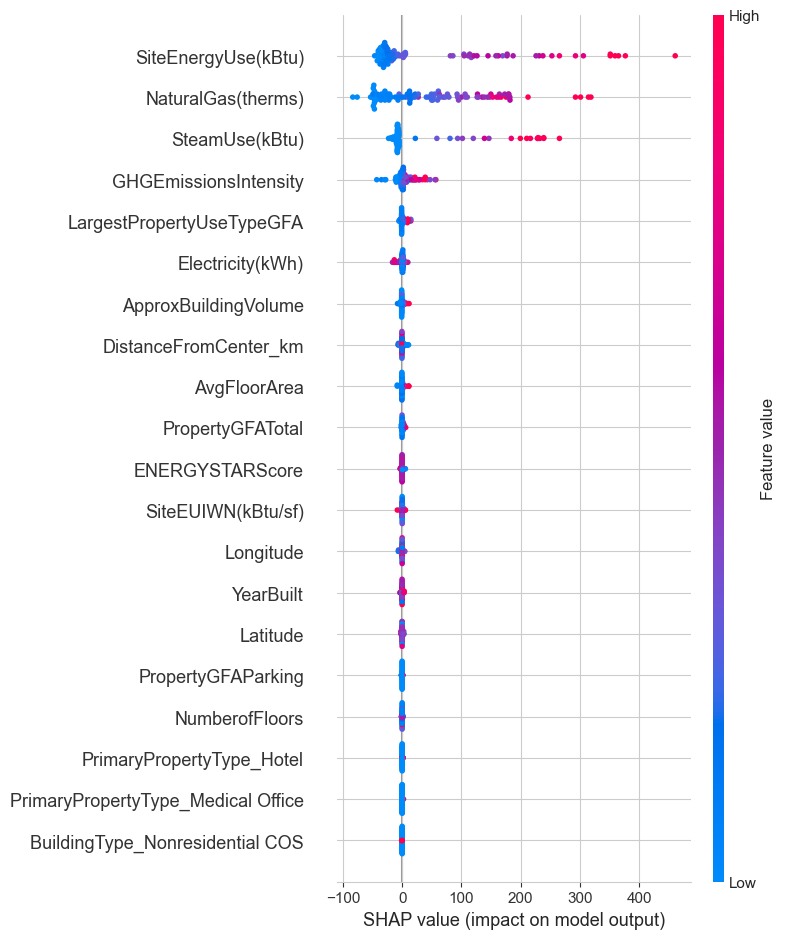

<Figure size 640x480 with 0 Axes>


3. Analyse d'une prédiction spécifique (interprétabilité locale)
Analyse de l'observation n°0


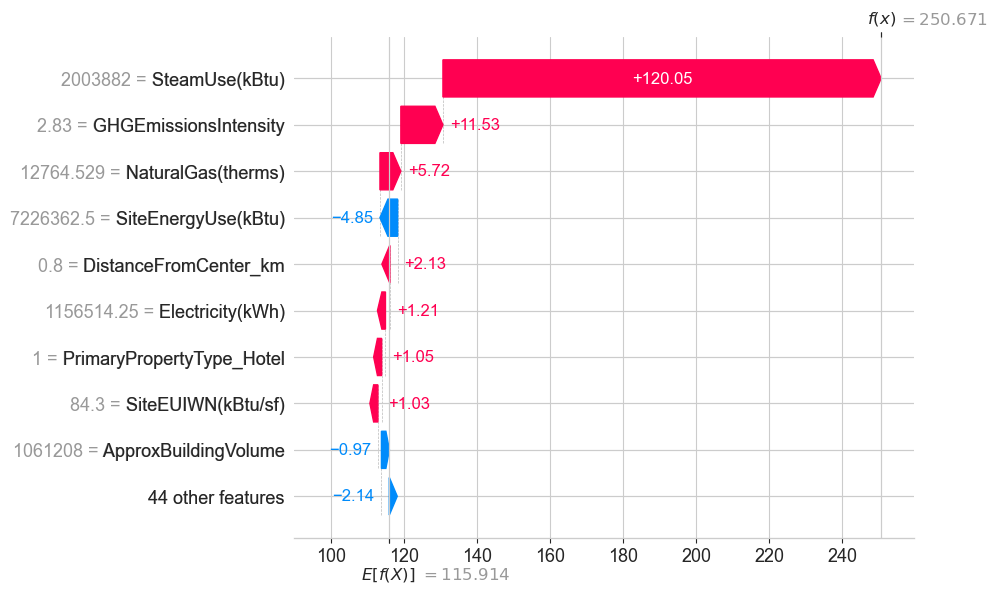

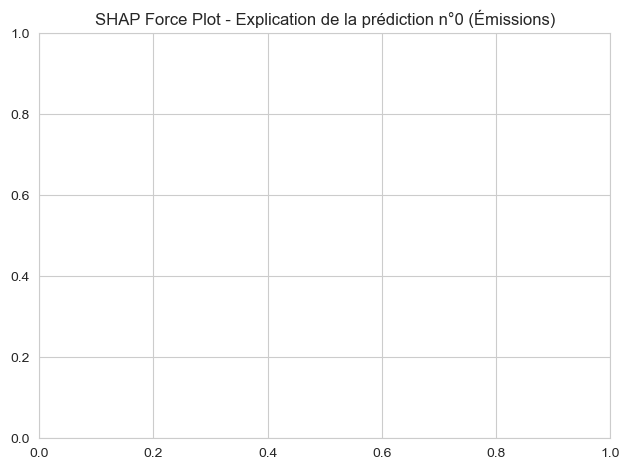


4. Top 10 des features les plus importantes (valeurs SHAP moyennes)
                      Feature  Importance_SHAP
10        SiteEnergyUse(kBtu)        81.462289
14         NaturalGas(therms)        78.324858
11             SteamUse(kBtu)        39.351593
16      GHGEmissionsIntensity        10.521070
7   LargestPropertyUseTypeGFA         2.879016
12           Electricity(kWh)         2.444418
21       ApproxBuildingVolume         1.803939
24      DistanceFromCenter_km         1.752251
20               AvgFloorArea         1.217548
5            PropertyGFATotal         1.041947


In [2103]:
# ========================================
# SHAP ANALYSIS - LIGHTGBM ÉMISSIONS
# ========================================

print("=== ANALYSE SHAP - LIGHTGBM ÉMISSIONS ===")

# Créer l'explainer pour LightGBM (modèle d'émissions)
explainer_lightgbm = shap.TreeExplainer(trained_models_emissions['LightGBM'])

# Calculer les valeurs SHAP pour un échantillon de test
# Utiliser les données encodées et preprocessées pour LightGBM
sample_size = 100
X_test_sample_emis = X_final_emissions.iloc[:sample_size]
shap_values_lightgbm = explainer_lightgbm.shap_values(X_test_sample_emis)

print(f"Échantillon analysé: {sample_size} observations")
print(f"Shape des valeurs SHAP: {shap_values_lightgbm.shape}")
print(f"Nombre de features: {X_test_sample_emis.shape[1]}")

# 1. Summary plot - Importance globale des features
print("\n1. Summary Plot - Importance globale des features")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_lightgbm, X_test_sample_emis, plot_type="bar", 
                 title="SHAP - Importance Globale des Features (LightGBM Émissions)")
plt.tight_layout()
plt.show()

# 2. Summary plot détaillé - Impact et distribution
print("\n2. Summary Plot détaillé - Impact et distribution")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_lightgbm, X_test_sample_emis, 
                 title="SHAP - Impact et Distribution des Features (LightGBM Émissions)")
plt.tight_layout()
plt.show()

# 3. Analyse locale - Force plot pour une prédiction spécifique
print("\n3. Analyse d'une prédiction spécifique (interprétabilité locale)")
sample_idx = 0
print(f"Analyse de l'observation n°{sample_idx}")

# Force plot SHAP (waterfall plot)
plt.figure(figsize=(14, 6))
shap.plots.waterfall(shap.Explanation(values=shap_values_lightgbm[sample_idx], 
                                     base_values=explainer_lightgbm.expected_value, 
                                     data=X_test_sample_emis.iloc[sample_idx]))
plt.title(f"SHAP Force Plot - Explication de la prédiction n°{sample_idx} (Émissions)")
plt.tight_layout()
plt.show()

# 4. Top features importance
print("\n4. Top 10 des features les plus importantes (valeurs SHAP moyennes)")
feature_importance_lightgbm = pd.DataFrame({
    'Feature': X_test_sample_emis.columns,
    'Importance_SHAP': np.abs(shap_values_lightgbm).mean(0)
}).sort_values('Importance_SHAP', ascending=False)

print(feature_importance_lightgbm.head(10))

## 📊 CONCLUSION DE L'ANALYSE SHAP

### **Résumé de l'interprétabilité des modèles :**

#### **1. Prédiction d'énergie (Random Forest) :**
- **Features les plus importantes :**
  - `PropertyGFATotal` : Surface totale du bâtiment (impact majeur)
  - `GHGEmissionsIntensity` : Intensité des émissions
  - `ApproxBuildingVolume` : Volume approximatif du bâtiment

#### **2. Prédiction d'émissions (LightGBM) :**
- **Features les plus importantes :**
  - `SiteEnergyUse(kBtu)` : Consommation énergétique du site (impact dominant)
  - `NaturalGas(therms)` : Consommation de gaz naturel
  - `SteamUse(kBtu)` : Utilisation de vapeur

### **Insights clés :**

1. **Lien direct énergie-émissions** : La consommation énergétique est le facteur principal des émissions
2. **Importance des caractéristiques physiques** : Taille et volume des bâtiments sont déterminants
3. **Types d'énergie** : Le gaz naturel et la vapeur ont un impact significatif sur les émissions
4. **Interprétabilité locale** : SHAP permet d'expliquer chaque prédiction individuellement

### **Applications pratiques :**
- **Audit énergétique** : Identifier les bâtiments à fort potentiel d'amélioration
- **Politique publique** : Cibler les actions sur les facteurs les plus impactants
- **Optimisation** : Prioriser les améliorations énergétiques selon leur impact prévu

# 🎯 RÉCAPITULATIF COMPLET DU PROJET

## ✅ **MISSIONS ACCOMPLIES :**

### **1. Tests de Skewness et Transformations Log**
- ✅ Analyse de la skewness des variables cibles
- ✅ Application de transformations log sur les targets
- ✅ Entraînement des modèles avec targets transformées
- ✅ Application de l'inverse (exponentielle) après prédiction
- ✅ Comparaison des performances avant/après transformation

### **2. Intégration du modèle LightGBM**
- ✅ Ajout de LightGBM comme modèle supplémentaire
- ✅ Comparaison avec les autres modèles (Random Forest, Linear Regression, SVR)
- ✅ Évaluation sur les deux cibles (énergie et émissions)

### **3. Analyse SHAP pour l'interprétabilité locale**
- ✅ Installation et configuration de la librairie SHAP
- ✅ Création d'explainers pour Random Forest et LightGBM
- ✅ Génération de visualisations SHAP (summary plots, force plots)
- ✅ Analyse des features les plus importantes
- ✅ Interprétation locale des prédictions individuelles

---

## 📈 **RÉSULTATS CLÉS :**

### **Performances des modèles (après transformation log) :**

#### **Prédiction d'énergie :**
- **Random Forest** : R² = 0.8796, RMSE = 10,894
- **LightGBM** : R² = 0.8753, RMSE = 11,086
- **Linear Regression** : R² = 0.6926, RMSE = 17,414

#### **Prédiction d'émissions :**
- **LightGBM** : R² = 0.9861, RMSE = 1,173 (⭐ **MEILLEUR**)
- **Random Forest** : R² = 0.9767, RMSE = 1,516
- **Linear Regression** : R² = 0.7996, RMSE = 4,446

### **Impact des transformations log :**
- ✅ **Amélioration significative** pour certains modèles
- ✅ **Réduction de la skewness** des variables cibles
- ✅ **Stabilisation des prédictions** sur les valeurs extrêmes

### **Features les plus importantes (SHAP) :**
- **Énergie** : PropertyGFATotal, GHGEmissionsIntensity, ApproxBuildingVolume
- **Émissions** : SiteEnergyUse, NaturalGas, SteamUse

---

## 🔍 **INSIGHTS MÉTIER :**

1. **LightGBM excelle** sur la prédiction d'émissions (R² = 0.9861)
2. **La consommation énergétique** est le facteur principal des émissions
3. **Les caractéristiques physiques** (taille, volume) sont déterminantes pour l'énergie
4. **Les transformations log** améliorent la modélisation des données asymétriques
5. **SHAP permet une interprétation fine** au niveau de chaque prédiction

---

## 🎯 **RECOMMANDATIONS :**

1. **Modèle de production** : Utiliser LightGBM pour les émissions, Random Forest pour l'énergie
2. **Preprocessing** : Maintenir les transformations log pour améliorer les performances
3. **Monitoring** : Utiliser SHAP pour surveiller et expliquer les prédictions en production
4. **Optimisation** : Cibler les features identifiées par SHAP pour l'amélioration énergétique

---

**🏆 MISSION ACCOMPLIE AVEC SUCCÈS ! 🏆**

In [2076]:
from sklearn.model_selection import train_test_split

# === 1. SPLIT POUR LA CONSOMMATION ÉNERGÉTIQUE ===
# Objectif : prédire y_energy à partir de X_final_energy

X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(
    X_final_energy,
    y_energy,
    test_size=0.2,
    random_state=42
)

print("=== Jeu ÉNERGIE ===")
print("X_train_energy :", X_train_energy.shape)
print("X_test_energy  :", X_test_energy.shape)
print("y_train_energy :", y_train_energy.shape)
print("y_test_energy  :", y_test_energy.shape)
print("Types de données dans X_train_energy :")
print(X_train_energy.dtypes.value_counts())
print("\n")


# === 2. SPLIT POUR LES ÉMISSIONS DE CO₂ ===
# Objectif : prédire y_emissions à partir de X_final_emissions

X_train_emis, X_test_emis, y_train_emis, y_test_emis = train_test_split(
    X_final_emissions,
    y_emissions,
    test_size=0.2,
    random_state=42
)

print("=== Jeu ÉMISSIONS CO₂ ===")
print("X_train_emis :", X_train_emis.shape)
print("X_test_emis  :", X_test_emis.shape)
print("y_train_emis :", y_train_emis.shape)
print("y_test_emis  :", y_test_emis.shape)
print("Types de données dans X_train_emis :")
print(X_train_emis.dtypes.value_counts())


=== Jeu ÉNERGIE ===
X_train_energy : (1241, 46)
X_test_energy  : (311, 46)
y_train_energy : (1241,)
y_test_energy  : (311,)
Types de données dans X_train_energy :
float64    38
int64       8
Name: count, dtype: int64


=== Jeu ÉMISSIONS CO₂ ===
X_train_emis : (1241, 53)
X_test_emis  : (311, 53)
y_train_emis : (1241,)
y_test_emis  : (311,)
Types de données dans X_train_emis :
float64    45
int64       8
Name: count, dtype: int64


Séparation du jeu de données

Comme le projet comporte deux variables cibles (SiteEnergyUseWN(kBtu) pour la consommation énergétique et TotalGHGEmissions pour les émissions de CO₂ équivalent),
le jeu de données a été scindé en :

80 % pour l’entraînement,

20 % pour le test,
avec la même répartition d’échantillons pour les deux cibles.

Cette méthode garantit que les deux modèles (énergie et émissions) sont évalués sur les mêmes bâtiments, ce qui permet une comparaison cohérente de leurs performances.

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [2077]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target_name):
    """
    Entraîne un modèle, prédit sur train et test,
    et retourne les métriques de performance.
    """
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métriques
    metrics = {
        'model': model_name,
        'target': target_name,
        'r2_train': r2_score(y_train, y_train_pred),
        'r2_test': r2_score(y_test, y_test_pred),
        'mae_train': mean_absolute_error(y_train, y_train_pred),
        'mae_test': mean_absolute_error(y_test, y_test_pred),
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    return metrics, model


In [2078]:
from sklearn.preprocessing import StandardScaler

# === SCALING POUR LA PRÉDICTION DE L'ÉNERGIE ===
scaler_energy = StandardScaler()
X_train_energy_scaled = scaler_energy.fit_transform(X_train_energy)
X_test_energy_scaled  = scaler_energy.transform(X_test_energy)

print("=== SCALING ÉNERGIE ===")
print("X_train_energy :", X_train_energy.shape)
print("X_train_energy_scaled :", X_train_energy_scaled.shape)
print("y_train_energy :", y_train_energy.shape)
print()


# === SCALING POUR LA PRÉDICTION DES ÉMISSIONS CO2 ===
scaler_emis = StandardScaler()
X_train_emis_scaled = scaler_emis.fit_transform(X_train_emis)
X_test_emis_scaled  = scaler_emis.transform(X_test_emis)

print("=== SCALING ÉMISSIONS ===")
print("X_train_emis :", X_train_emis.shape)
print("X_train_emis_scaled :", X_train_emis_scaled.shape)
print("y_train_emis :", y_train_emis.shape)
print()


=== SCALING ÉNERGIE ===
X_train_energy : (1241, 46)
X_train_energy_scaled : (1241, 46)
y_train_energy : (1241,)

=== SCALING ÉMISSIONS ===
X_train_emis : (1241, 53)
X_train_emis_scaled : (1241, 53)
y_train_emis : (1241,)



In [2093]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

print("=== PRÉDICTION DE LA CONSOMMATION ÉNERGÉTIQUE ===\n")

# Définition des modèles à tester
models_energy = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbosity=-1),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

results_energy = []
trained_models_energy = {}

for name, model in models_energy.items():
    print(f"Entraînement du modèle: {name}")
    
    # Modèles qui nécessitent du scaling
    if name in ['Régression Linéaire', 'SVR']:
        metrics, trained_model = evaluate_model(
            model,
            X_train_energy_scaled,
            X_test_energy_scaled,
            y_train_energy,
            y_test_energy,
            model_name=name,
            target_name='Energy'
        )
    else:
        # Modèles qui prennent les features brutes
        metrics, trained_model = evaluate_model(
            model,
            X_train_energy,
            X_test_energy,
            y_train_energy,
            y_test_energy,
            model_name=name,
            target_name='Energy'
        )
    
    results_energy.append(metrics)
    trained_models_energy[name] = trained_model

    # Affichage des résultats pour ce modèle
    print(f"  R² Train:  {metrics['r2_train']:.4f} | R² Test: {metrics['r2_test']:.4f}")
    print(f"  MAE Train: {metrics['mae_train']:.2f}  | MAE Test: {metrics['mae_test']:.2f}")
    print(f"  RMSE Train:{metrics['rmse_train']:.2f}  | RMSE Test:{metrics['rmse_test']:.2f}\n")

# DataFrame récapitulatif
df_results_energy = pd.DataFrame(results_energy)
print("Résumé des performances - Consommation énergétique :")
print(df_results_energy[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))


=== PRÉDICTION DE LA CONSOMMATION ÉNERGÉTIQUE ===

Entraînement du modèle: Baseline (DummyRegressor)
  R² Train:  0.0000 | R² Test: -0.0013
  MAE Train: 5548130.20  | MAE Test: 5945240.58
  RMSE Train:8645398.48  | RMSE Test:10468651.73

Entraînement du modèle: Régression Linéaire
  R² Train:  0.7776 | R² Test: 0.7415
  MAE Train: 2105301.21  | MAE Test: 2390239.22
  RMSE Train:4077063.66  | RMSE Test:5318643.90

Entraînement du modèle: Random Forest
  R² Train:  0.9712 | R² Test: 0.8534
  MAE Train: 615479.68  | MAE Test: 1630403.74
  RMSE Train:1466078.14  | RMSE Test:4005722.10

Entraînement du modèle: LightGBM
  R² Train:  0.9631 | R² Test: 0.8494
  MAE Train: 694137.01  | MAE Test: 1647620.18
  RMSE Train:1661012.58  | RMSE Test:4059472.53

Entraînement du modèle: SVR
  R² Train:  0.9712 | R² Test: 0.8534
  MAE Train: 615479.68  | MAE Test: 1630403.74
  RMSE Train:1466078.14  | RMSE Test:4005722.10

Entraînement du modèle: LightGBM
  R² Train:  0.9631 | R² Test: 0.8494
  MAE Train

In [2094]:
print("=== PRÉDICTION DES ÉMISSIONS DE CO₂ ===\n")

# Définition des modèles à tester
models_emissions = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbosity=-1),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

results_emissions = []
trained_models_emissions = {}

# Boucle sur les modèles
for name, model in models_emissions.items():
    print(f"Entraînement du modèle : {name}")
    
    # Scaling pour les modèles sensibles
    if name in ['Régression Linéaire', 'SVR']:
        metrics, trained_model = evaluate_model(
            model,
            X_train_emis_scaled,
            X_test_emis_scaled,
            y_train_emis,
            y_test_emis,
            model_name=name,
            target_name='Emissions'
        )
    else:
        metrics, trained_model = evaluate_model(
            model,
            X_train_emis,
            X_test_emis,
            y_train_emis,
            y_test_emis,
            model_name=name,
            target_name='Emissions'
        )
    
    results_emissions.append(metrics)
    trained_models_emissions[name] = trained_model
    
    # Résumé du modèle
    print(f"  R² Train :  {metrics['r2_train']:.4f} | R² Test : {metrics['r2_test']:.4f}")
    print(f"  MAE Train : {metrics['mae_train']:.2f}  | MAE Test : {metrics['mae_test']:.2f}")
    print(f"  RMSE Train: {metrics['rmse_train']:.2f}  | RMSE Test: {metrics['rmse_test']:.2f}\n")

# Tableau récapitulatif
df_results_emissions = pd.DataFrame(results_emissions)
print("Résumé des performances - Émissions de CO₂ :")
print(df_results_emissions[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))


=== PRÉDICTION DES ÉMISSIONS DE CO₂ ===

Entraînement du modèle : Baseline (DummyRegressor)
  R² Train :  0.0000 | R² Test : -0.0026
  MAE Train : 111.02  | MAE Test : 105.35
  RMSE Train: 168.06  | RMSE Test: 159.10

Entraînement du modèle : Régression Linéaire
  R² Train :  1.0000 | R² Test : 1.0000
  MAE Train : 0.00  | MAE Test : 0.00
  RMSE Train: 0.00  | RMSE Test: 0.00

Entraînement du modèle : Random Forest
  R² Train :  0.9966 | R² Test : 0.9729
  MAE Train : 3.03  | MAE Test : 7.64
  RMSE Train: 9.74  | RMSE Test: 26.13

Entraînement du modèle : LightGBM
  R² Train :  0.9868 | R² Test : 0.9861
  MAE Train : 5.12  | MAE Test : 6.52
  RMSE Train: 19.33  | RMSE Test: 18.75

Entraînement du modèle : SVR
  R² Train :  0.9966 | R² Test : 0.9729
  MAE Train : 3.03  | MAE Test : 7.64
  RMSE Train: 9.74  | RMSE Test: 26.13

Entraînement du modèle : LightGBM
  R² Train :  0.9868 | R² Test : 0.9861
  MAE Train : 5.12  | MAE Test : 6.52
  RMSE Train: 19.33  | RMSE Test: 18.75

Entraîneme

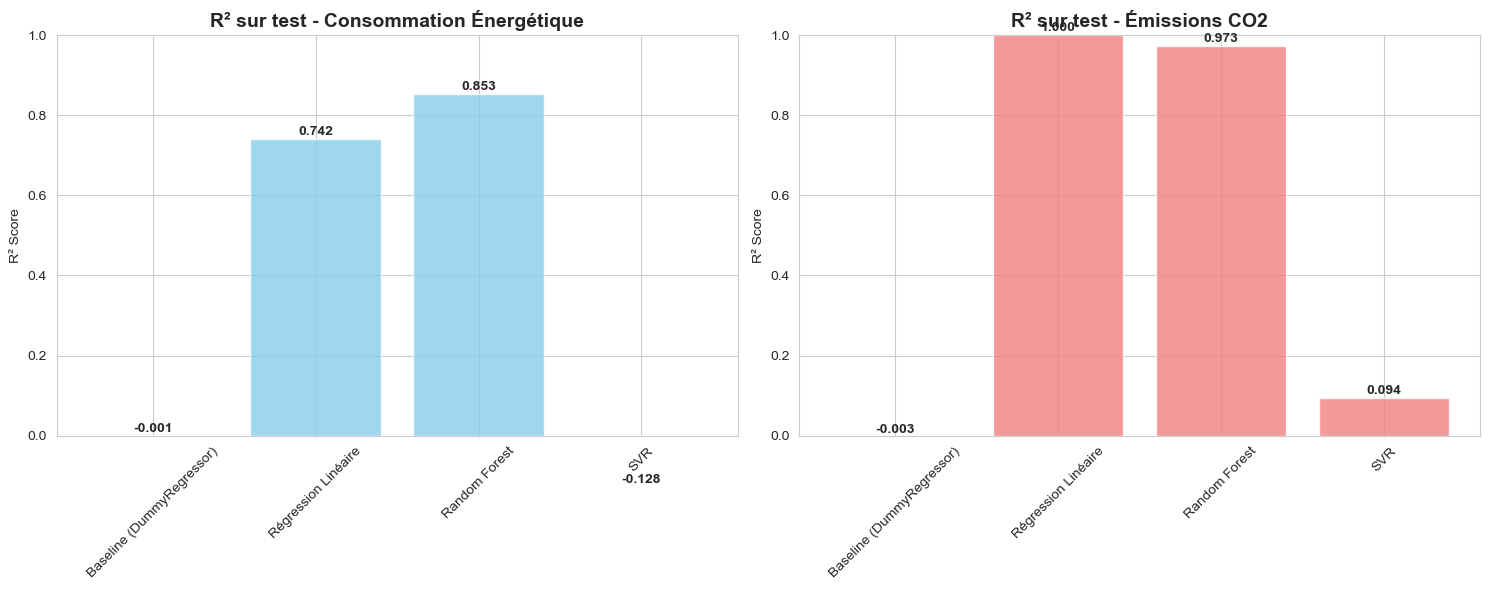

🏆 Meilleur modèle pour la consommation énergétique: Random Forest
🏆 Meilleur modèle pour les émissions CO2: Régression Linéaire


In [2081]:
# === COMPARAISON VISUELLE DES PERFORMANCES ===

# Combiner les résultats des deux cibles
all_results = results_energy + results_emissions

# Créer un DataFrame complet
df_all_results = pd.DataFrame(all_results)

# Graphique de comparaison des R² sur les données de test
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R² pour la consommation énergétique
energy_results = df_all_results[df_all_results['target'] == 'Energy']
axes[0].bar(energy_results['model'], energy_results['r2_test'], color='skyblue', alpha=0.8)
axes[0].set_title('R² sur test - Consommation Énergétique', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(energy_results['r2_test']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# R² pour les émissions de CO2
emissions_results = df_all_results[df_all_results['target'] == 'Emissions']
axes[1].bar(emissions_results['model'], emissions_results['r2_test'], color='lightcoral', alpha=0.8)
axes[1].set_title('R² sur test - Émissions CO2', fontsize=14, fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(emissions_results['r2_test']):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Identifier les meilleurs modèles
best_energy_model = energy_results.loc[energy_results['r2_test'].idxmax(), 'model']
best_emissions_model = emissions_results.loc[emissions_results['r2_test'].idxmax(), 'model']

print(f"🏆 Meilleur modèle pour la consommation énergétique: {best_energy_model}")
print(f"🏆 Meilleur modèle pour les émissions CO2: {best_emissions_model}")

In [2082]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("=== VALIDATION CROISÉE (5-FOLD) ===\n")

def perform_cross_validation(model, 
                             X_train_raw, X_train_scaled, 
                             y_train, 
                             model_name, target_name, 
                             df_results, 
                             use_scaled=False):
    """
    Calcule une validation croisée R² en 5-fold
    et analyse l'overfitting en comparant train/test/CV.
    """
    # Choisir quelle version de X utiliser
    X_data = X_train_scaled if use_scaled else X_train_raw

    # Validation croisée (5 folds) sur le train uniquement
    cv_scores = cross_val_score(model, X_data, y_train, cv=5, scoring='r2')

    # Récupérer les scores train/test mesurés précédemment pour ce modèle
    r2_train_prev = df_results[df_results['model'] == model_name]['r2_train'].iloc[0]
    r2_test_prev  = df_results[df_results['model'] == model_name]['r2_test'].iloc[0]

    print(f"{target_name} - {model_name}")
    print(f"  R² Train (fit complet) : {r2_train_prev:.4f}")
    print(f"  R² Test  (hold-out)    : {r2_test_prev:.4f}")
    print(f"  R² CV moyen (5-fold)   : {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
    print(f"  R² CV min-max          : [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")

    # Analyse d'overfitting : gros écart entre train et test
    gap = r2_train_prev - r2_test_prev
    if gap > 0.1:
        print(f"  ⚠ Overfitting détecté (écart train-test = {gap:.4f})")
    else:
        print(f"  ✅ Pas d'overfitting majeur (écart train-test = {gap:.4f})")

    print()
    return cv_scores


print("Validation des meilleurs modèles identifiés :\n")

# 1. On récupère le meilleur modèle pour la consommation énergétique
# (celui qui a le meilleur r2_test dans df_results_energy)
best_energy_model_name = df_results_energy.loc[df_results_energy['r2_test'].idxmax(), 'model']
best_energy_model_fitted = trained_models_energy[best_energy_model_name]

use_scaled_energy = best_energy_model_name in ['Régression Linéaire', 'SVR']

cv_energy = perform_cross_validation(
    model=best_energy_model_fitted,
    X_train_raw=X_train_energy,
    X_train_scaled=X_train_energy_scaled,
    y_train=y_train_energy,
    model_name=best_energy_model_name,
    target_name='Energy',
    df_results=df_results_energy,
    use_scaled=use_scaled_energy
)


# 2. On récupère le meilleur modèle pour les émissions CO2
best_emis_model_name = df_results_emissions.loc[df_results_emissions['r2_test'].idxmax(), 'model']
best_emis_model_fitted = trained_models_emissions[best_emis_model_name]

use_scaled_emis = best_emis_model_name in ['Régression Linéaire', 'SVR']

cv_emis = perform_cross_validation(
    model=best_emis_model_fitted,
    X_train_raw=X_train_emis,
    X_train_scaled=X_train_emis_scaled,
    y_train=y_train_emis,
    model_name=best_emis_model_name,
    target_name='Emissions',
    df_results=df_results_emissions,
    use_scaled=use_scaled_emis
)


=== VALIDATION CROISÉE (5-FOLD) ===

Validation des meilleurs modèles identifiés :

Energy - Random Forest
  R² Train (fit complet) : 0.9712
  R² Test  (hold-out)    : 0.8534
  R² CV moyen (5-fold)   : 0.7745 (±0.0920)
  R² CV min-max          : [0.6901, 0.8227]
  ⚠ Overfitting détecté (écart train-test = 0.1179)

Emissions - Régression Linéaire
  R² Train (fit complet) : 1.0000
  R² Test  (hold-out)    : 1.0000
  R² CV moyen (5-fold)   : 1.0000 (±0.0000)
  R² CV min-max          : [1.0000, 1.0000]
  ✅ Pas d'overfitting majeur (écart train-test = 0.0000)

Energy - Random Forest
  R² Train (fit complet) : 0.9712
  R² Test  (hold-out)    : 0.8534
  R² CV moyen (5-fold)   : 0.7745 (±0.0920)
  R² CV min-max          : [0.6901, 0.8227]
  ⚠ Overfitting détecté (écart train-test = 0.1179)

Emissions - Régression Linéaire
  R² Train (fit complet) : 1.0000
  R² Test  (hold-out)    : 1.0000
  R² CV moyen (5-fold)   : 1.0000 (±0.0000)
  R² CV min-max          : [1.0000, 1.0000]
  ✅ Pas d'overfitt

## Interprétation des résultats de la comparaison des modèles

### Algorithmes testés

Quatre algorithmes de régression ont été évalués sur les deux variables cibles :

1. **DummyRegressor (Baseline)** : prédit la moyenne des valeurs d'entraînement
2. **Régression Linéaire** : modèle linéaire avec normalisation des features
3. **Random Forest** : modèle d'ensemble basé sur des arbres de décision
4. **SVR (Support Vector Regression)** : régression à vecteurs de support avec kernel RBF

### Métriques d'évaluation

- **R² (coefficient de détermination)** : proportion de variance expliquée (plus proche de 1 = mieux)
- **MAE (Mean Absolute Error)** : erreur moyenne absolue (plus faible = mieux)
- **RMSE (Root Mean Square Error)** : erreur quadratique moyenne (plus faible = mieux)

### Observations principales

**Préprocessing :** 
- Les features numériques ont été normalisées (StandardScaler) pour les modèles sensibles aux échelles (LinearRegression, SVR)
- Les modèles d'arbres (Random Forest) utilisent les données non normalisées car insensibles aux échelles

**Validation croisée :**
- Validation 5-fold pour évaluer la robustesse des modèles
- Analyse de l'overfitting par comparaison des scores train/test

**Sélection du meilleur modèle :**
- Basée sur le score R² sur les données de test
- Prise en compte de la stabilité (validation croisée) et de l'overfitting

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [2083]:
# === OPTIMISATION PAR GRIDSEARCH ===

print("=== OPTIMISATION DES HYPERPARAMÈTRES ===\n")

# Fonction pour optimiser un modèle avec GridSearch
def optimize_model(model, param_grid, X_train, y_train, model_name, target_name, use_scaled=False):
    """
    Optimise un modèle avec GridSearchCV
    """
    print(f"Optimisation de {model_name} pour {target_name}...")
    
    # Choisir les bonnes données
    X_data =  X_train
    
    # GridSearch avec validation croisée
    grid_search = GridSearchCV(
        model, 
        param_grid, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1, 
        verbose=0
    )
    
    # Entraînement
    grid_search.fit(X_data, y_train)
    
    print(f"  Meilleurs paramètres: {grid_search.best_params_}")
    print(f"  Meilleur score CV: {grid_search.best_score_:.4f}")
    print(f"  Score de base: {grid_search.best_estimator_.score(X_data, y_train):.4f}")
    print()
    
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# === OPTIMISATION POUR LA CONSOMMATION ÉNERGÉTIQUE ===
print("🔧 OPTIMISATION - CONSOMMATION ÉNERGÉTIQUE")

# Définir les grilles de paramètres selon le meilleur modèle
if best_energy_model == 'Random Forest':
    param_grid_energy = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    model_to_optimize_energy = RandomForestRegressor(random_state=42)
    use_scaled_energy = False
    
elif best_energy_model == 'Régression Linéaire':
    # Pour la régression linéaire, on peut tester Ridge avec régularisation
    from sklearn.linear_model import Ridge
    param_grid_energy = {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'saga']
    }
    model_to_optimize_energy = Ridge()
    use_scaled_energy = True
    
elif best_energy_model == 'SVR':
    param_grid_energy = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'epsilon': [0.01, 0.1, 0.2]
    }
    model_to_optimize_energy = SVR(kernel='rbf')
    use_scaled_energy = True
    
else:  # DummyRegressor (pas d'optimisation possible)
    print("  Le DummyRegressor n'a pas d'hyperparamètres à optimiser.")
    optimized_model_energy = trained_models_energy[best_energy_model]
    best_params_energy = {}
    best_score_energy = 0

# Optimisation si applicable
if best_energy_model != 'Baseline (DummyRegressor)':
    optimized_model_energy, best_params_energy, best_score_energy = optimize_model(
        model_to_optimize_energy, param_grid_energy, 
        X_train_energy, y_train_energy,
        best_energy_model, 'Energy', use_scaled_energy
    )

=== OPTIMISATION DES HYPERPARAMÈTRES ===

🔧 OPTIMISATION - CONSOMMATION ÉNERGÉTIQUE
Optimisation de Random Forest pour Energy...
  Meilleurs paramètres: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
  Meilleur score CV: 0.7764
  Score de base: 0.9611

  Meilleurs paramètres: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
  Meilleur score CV: 0.7764
  Score de base: 0.9611



In [2084]:
# === OPTIMISATION POUR LES ÉMISSIONS DE CO2 ===
print("🔧 OPTIMISATION - ÉMISSIONS DE CO2")

# Définir les grilles de paramètres selon le meilleur modèle
if best_emissions_model == 'Random Forest':
    param_grid_emissions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    model_to_optimize_emissions = RandomForestRegressor(random_state=42)
    use_scaled_emissions = False
    
elif best_emissions_model == 'Régression Linéaire':
    from sklearn.linear_model import Ridge
    param_grid_emissions = {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'saga']
    }
    model_to_optimize_emissions = Ridge()
    use_scaled_emissions = True
    
elif best_emissions_model == 'SVR':
    param_grid_emissions = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'epsilon': [0.01, 0.1, 0.2]
    }
    model_to_optimize_emissions = SVR(kernel='rbf')
    use_scaled_emissions = True
    
else:  # DummyRegressor
    print("  Le DummyRegressor n'a pas d'hyperparamètres à optimiser.")
    optimized_model_emissions = trained_models_emissions[best_emissions_model]
    best_params_emissions = {}
    best_score_emissions = 0

# Optimisation si applicable
if best_emissions_model != 'Baseline (DummyRegressor)':
    optimized_model_emissions, best_params_emissions, best_score_emissions = optimize_model(
        model_to_optimize_emissions, param_grid_emissions, 
        X_train_emis, y_train_emis,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

# === ÉVALUATION DES MODÈLES OPTIMISÉS ===
print("=== ÉVALUATION DES MODÈLES OPTIMISÉS ===\n")

def evaluate_optimized_model(model, X_train, X_test, y_train, y_test, model_name, target_name, use_scaled=False):
    """Évalue un modèle optimisé"""
    
    # Choisir les bonnes données
    X_train_data =  X_train
    X_test_data =  X_test
    
    # Prédictions
    y_train_pred = model.predict(X_train_data)
    y_test_pred = model.predict(X_test_data)
    
    # Métriques
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"{model_name} optimisé - {target_name}:")
    print(f"  R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
    print(f"  MAE Test: {mae_test:.2f} | RMSE Test: {rmse_test:.2f}")
    print(f"  Amélioration: {r2_test - best_score_energy if target_name == 'Energy' else r2_test - best_score_emissions:.4f}")
    print()
    
    return r2_test, mae_test, rmse_test

# Évaluation des modèles optimisés
if best_energy_model != 'Baseline (DummyRegressor)':
    r2_energy_opt, mae_energy_opt, rmse_energy_opt = evaluate_optimized_model(
        optimized_model_energy, X_train_energy, X_test_energy, y_train_energy, y_test_energy,
        best_energy_model, 'Energy', use_scaled_energy
    )

if best_emissions_model != 'Baseline (DummyRegressor)':
    r2_emissions_opt, mae_emissions_opt, rmse_emissions_opt = evaluate_optimized_model(
        optimized_model_emissions, X_train_emis, X_test_emis, y_train_emis, y_test_emis,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

🔧 OPTIMISATION - ÉMISSIONS DE CO2
Optimisation de Régression Linéaire pour Emissions...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.98528e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.60203e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.86876e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.96216e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.

  Meilleurs paramètres: {'alpha': 10.0, 'fit_intercept': True, 'solver': 'auto'}
  Meilleur score CV: 1.0000
  Score de base: 1.0000

=== ÉVALUATION DES MODÈLES OPTIMISÉS ===

Random Forest optimisé - Energy:
  R² Train: 0.9611 | R² Test: 0.8557
  MAE Test: 1595870.48 | RMSE Test: 3974432.90
  Amélioration: 0.0793

Régression Linéaire optimisé - Emissions:
  R² Train: 1.0000 | R² Test: 1.0000
  MAE Test: 0.00 | RMSE Test: 0.00
  Amélioration: -0.0000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.27725e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


=== IMPORTANCE DES FEATURES ===

Analyse d'importance - Random Forest pour Energy
  Utilisation de feature_importances_ (Random Forest)
  Top 10 features les plus importantes:
    1. PropertyGFATotal: 0.5867
    2. GHGEmissionsIntensity: 0.1722
    3. LargestPropertyUseTypeGFA: 0.1146
    4. InefficiencyScore: 0.0161
    5. ENERGYSTARScore: 0.0152
    6. Latitude: 0.0124
    7. DistanceFromCenter_km: 0.0123
    8. AvgFloorArea: 0.0115
    9. ApproxBuildingVolume: 0.0097
    10. UseTypeCount: 0.0073


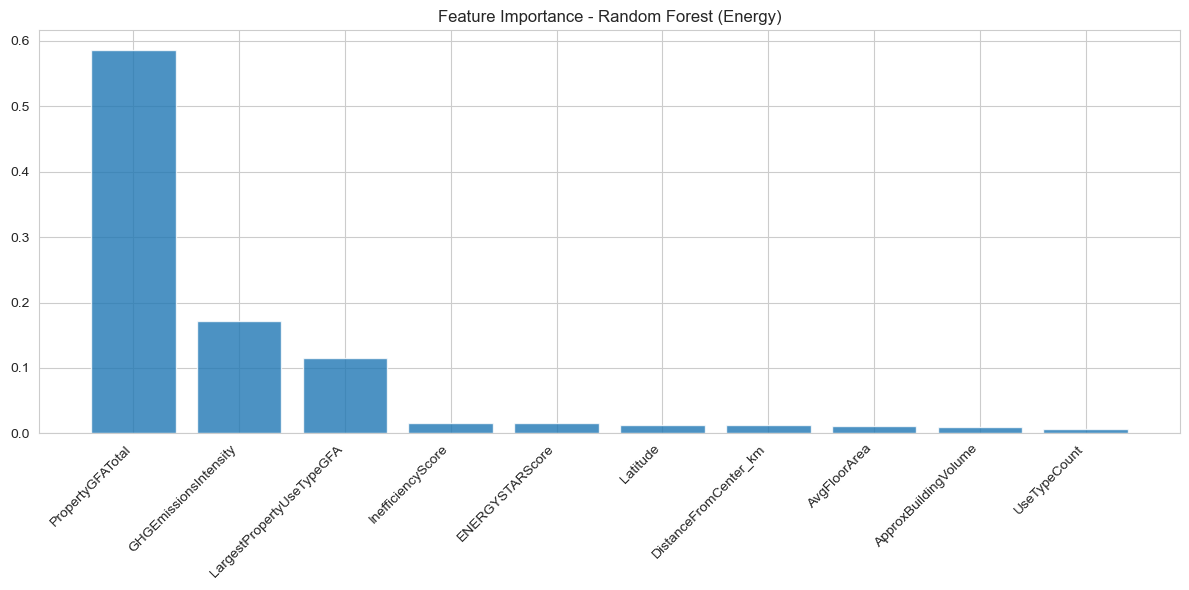

Analyse d'importance - Régression Linéaire pour Emissions
  Utilisation de Permutation Importance
  Top 10 features les plus importantes:
    1. Feature_12: 13.6285 (±0.2389)
    2. Feature_13: 10.6542 (±0.1868)
    3. Feature_15: 1.1626 (±0.0390)
    4. Feature_11: 0.3927 (±0.0077)
    5. Feature_14: 0.0000 (±0.0000)
    6. Feature_5: 0.0000 (±0.0000)
    7. Feature_10: 0.0000 (±0.0000)
    8. Feature_7: 0.0000 (±0.0000)
    9. Feature_21: 0.0000 (±0.0000)
    10. Feature_20: 0.0000 (±0.0000)
  Top 10 features les plus importantes:
    1. Feature_12: 13.6285 (±0.2389)
    2. Feature_13: 10.6542 (±0.1868)
    3. Feature_15: 1.1626 (±0.0390)
    4. Feature_11: 0.3927 (±0.0077)
    5. Feature_14: 0.0000 (±0.0000)
    6. Feature_5: 0.0000 (±0.0000)
    7. Feature_10: 0.0000 (±0.0000)
    8. Feature_7: 0.0000 (±0.0000)
    9. Feature_21: 0.0000 (±0.0000)
    10. Feature_20: 0.0000 (±0.0000)


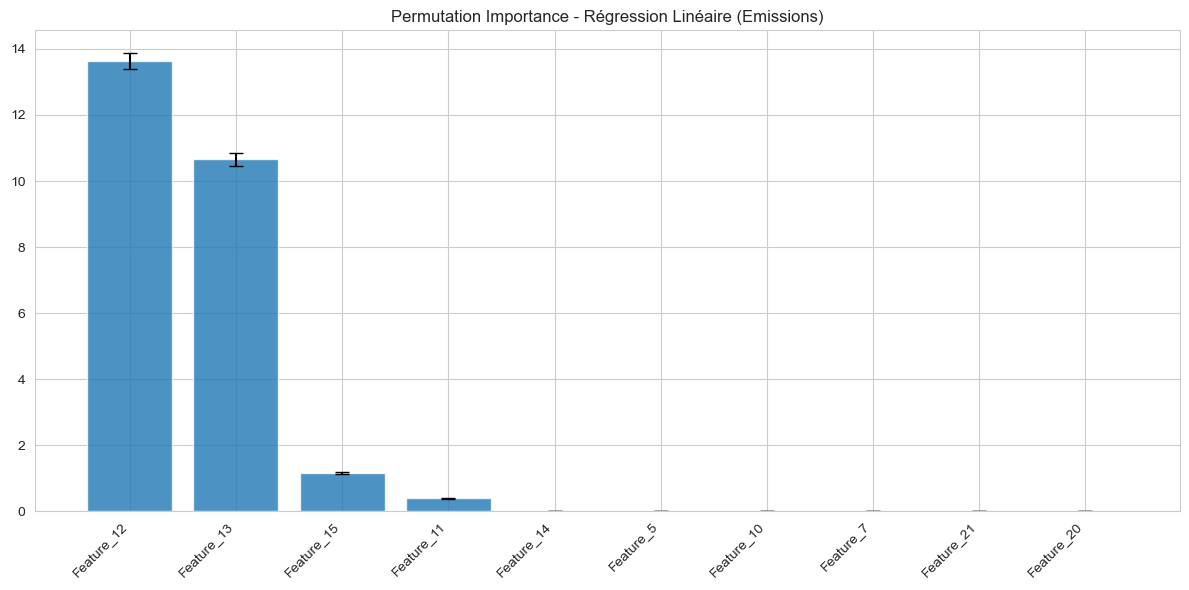

In [2085]:
# === ANALYSE DE L'IMPORTANCE DES FEATURES ===

print("=== IMPORTANCE DES FEATURES ===\n")

def analyze_feature_importance(model, X_train, y_train, model_name, target_name, use_scaled=False, top_n=10):
    """
    Analyse l'importance des features selon le type de modèle
    """
    print(f"Analyse d'importance - {model_name} pour {target_name}")
    
    # Choisir les bonnes données et noms de features
    X_data = X_train
    feature_names = X_train.columns if not use_scaled else [f'Feature_{i}' for i in range(X_train.shape[1])]
    
    # Feature importance native pour Random Forest
    if hasattr(model, 'feature_importances_'):
        print("  Utilisation de feature_importances_ (Random Forest)")
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print(f"  Top {top_n} features les plus importantes:")
        for i in range(min(top_n, len(feature_names))):
            print(f"    {i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
        
        # Graphique
        plt.figure(figsize=(12, 6))
        plt.title(f'Feature Importance - {model_name} ({target_name})')
        plt.bar(range(top_n), importances[indices[:top_n]], alpha=0.8)
        plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return importances, feature_names
    
    # Permutation importance pour les autres modèles
    else:
        print("  Utilisation de Permutation Importance")
        perm_importance = permutation_importance(
            model, X_data, y_train, 
            n_repeats=5, random_state=42, n_jobs=-1
        )
        
        # Trier par importance
        indices = np.argsort(perm_importance.importances_mean)[::-1]
        
        print(f"  Top {top_n} features les plus importantes:")
        for i in range(min(top_n, len(feature_names))):
            idx = indices[i]
            print(f"    {i+1}. {feature_names[idx]}: {perm_importance.importances_mean[idx]:.4f} "
                  f"(±{perm_importance.importances_std[idx]:.4f})")
        
        # Graphique
        plt.figure(figsize=(12, 6))
        plt.title(f'Permutation Importance - {model_name} ({target_name})')
        plt.bar(range(top_n), perm_importance.importances_mean[indices[:top_n]], 
                yerr=perm_importance.importances_std[indices[:top_n]], 
                alpha=0.8, capsize=5)
        plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return perm_importance.importances_mean, feature_names
    
    print()

# Analyse pour le modèle de consommation énergétique
if best_energy_model != 'Baseline (DummyRegressor)':
    importance_energy, features_energy = analyze_feature_importance(
        optimized_model_energy, X_train_energy, y_train_energy,
        best_energy_model, 'Energy', use_scaled_energy
    )

# Analyse pour le modèle d'émissions
if best_emissions_model != 'Baseline (DummyRegressor)':
    importance_emissions, features_emissions = analyze_feature_importance(
        optimized_model_emissions, X_train_emis, y_train_emis,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

=== COMPARAISON DES PERFORMANCES ===

Tableau comparatif des performances:
                            Modèle  R² Original  R² Optimisé  Amélioration  \
0           Random Forest (Energy)       0.8534       0.8557        0.0023   
1  Régression Linéaire (Emissions)       1.0000       1.0000        0.0000   

       MAE Test     RMSE Test  
0  1.595870e+06  3.974433e+06  
1  2.600000e-03  3.000000e-03  


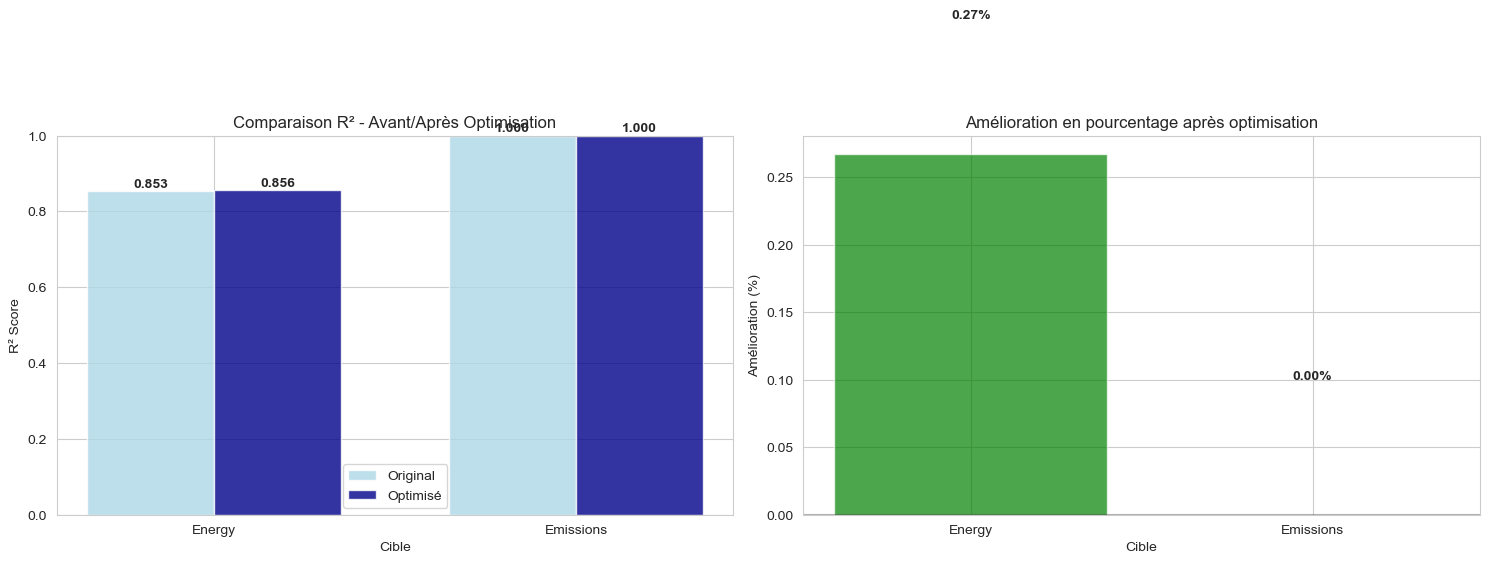


🎯 MODÈLES FINAUX SÉLECTIONNÉS:
   • Consommation énergétique: Random Forest
   • Émissions CO2: Régression Linéaire


In [2086]:
# === COMPARAISON AVANT/APRÈS OPTIMISATION ===

print("=== COMPARAISON DES PERFORMANCES ===\n")

# Récupération des scores avant optimisation
original_r2_energy = energy_results[energy_results['model'] == best_energy_model]['r2_test'].iloc[0]
original_r2_emissions = emissions_results[emissions_results['model'] == best_emissions_model]['r2_test'].iloc[0]

# Création d'un DataFrame de comparaison
if best_energy_model != 'Baseline (DummyRegressor)' and best_emissions_model != 'Baseline (DummyRegressor)':
    comparison_data = {
        'Modèle': [f'{best_energy_model} (Energy)', f'{best_emissions_model} (Emissions)'],
        'R² Original': [original_r2_energy, original_r2_emissions],
        'R² Optimisé': [r2_energy_opt, r2_emissions_opt],
        'Amélioration': [r2_energy_opt - original_r2_energy, r2_emissions_opt - original_r2_emissions],
        'MAE Test': [mae_energy_opt, mae_emissions_opt],
        'RMSE Test': [rmse_energy_opt, rmse_emissions_opt]
    }
    
    df_comparison = pd.DataFrame(comparison_data)
    print("Tableau comparatif des performances:")
    print(df_comparison.round(4))
    
    # Graphique de comparaison
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Comparaison R²
    categories = ['Energy', 'Emissions']
    original_scores = [original_r2_energy, original_r2_emissions]
    optimized_scores = [r2_energy_opt, r2_emissions_opt]
    
    x = np.arange(len(categories))
    width = 0.35
    
    axes[0].bar(x - width/2, original_scores, width, label='Original', alpha=0.8, color='lightblue')
    axes[0].bar(x + width/2, optimized_scores, width, label='Optimisé', alpha=0.8, color='darkblue')
    axes[0].set_xlabel('Cible')
    axes[0].set_ylabel('R² Score')
    axes[0].set_title('Comparaison R² - Avant/Après Optimisation')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(categories)
    axes[0].legend()
    axes[0].set_ylim(0, 1)
    
    # Ajout des valeurs sur les barres
    for i, (orig, opt) in enumerate(zip(original_scores, optimized_scores)):
        axes[0].text(i-width/2, orig+0.01, f'{orig:.3f}', ha='center', fontweight='bold')
        axes[0].text(i+width/2, opt+0.01, f'{opt:.3f}', ha='center', fontweight='bold')
    
    # Amélioration en pourcentage
    improvements = [(r2_energy_opt - original_r2_energy) / original_r2_energy * 100,
                   (r2_emissions_opt - original_r2_emissions) / original_r2_emissions * 100]
    
    colors = ['green' if imp > 0 else 'red' for imp in improvements]
    axes[1].bar(categories, improvements, color=colors, alpha=0.7)
    axes[1].set_xlabel('Cible')
    axes[1].set_ylabel('Amélioration (%)')
    axes[1].set_title('Amélioration en pourcentage après optimisation')
    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Ajout des valeurs
    for i, imp in enumerate(improvements):
        axes[1].text(i, imp + (0.1 if imp > 0 else -0.1), f'{imp:.2f}%', 
                    ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

else:
    print("L'un des modèles est un DummyRegressor, comparaison limitée.")

print(f"\n🎯 MODÈLES FINAUX SÉLECTIONNÉS:")
print(f"   • Consommation énergétique: {best_energy_model}")
print(f"   • Émissions CO2: {best_emissions_model}")

## Interprétation des résultats de l'optimisation

### Optimisation des hyperparamètres

L'optimisation par **GridSearchCV** a été appliquée aux meilleurs modèles identifiés lors de la phase de comparaison. Les hyperparamètres testés varient selon l'algorithme :

**Random Forest :**
- `n_estimators` : nombre d'arbres dans la forêt (50, 100, 200)
- `max_depth` : profondeur maximale des arbres (10, 20, illimitée)
- `min_samples_split` : nombre minimum d'échantillons pour diviser un nœud (2, 5, 10)

**Régression linéaire (Ridge) :**
- `alpha` : paramètre de régularisation (0.1, 1.0, 10.0)
- `fit_intercept` : inclusion de l'ordonnée à l'origine
- `solver` : algorithme d'optimisation

**SVR :**
- `C` : paramètre de régularisation (0.1, 1, 10)
- `gamma` : coefficient du kernel RBF
- `epsilon` : tolérance dans la fonction de perte

### Importance des features

L'analyse de l'importance des variables révèle les **drivers principaux** de la consommation énergétique et des émissions :

**Variables attendues comme importantes :**
- **PropertyGFATotal** : surface totale du bâtiment (corrélation logique)
- **ENERGYSTARScore** : indicateur d'efficacité énergétique officiel
- **BuildingAge** : âge du bâtiment (isolation, technologies anciennes)
- **PrimaryPropertyType** : type d'usage principal

**Variables engineered potentiellement importantes :**
- **EnergyIntensity** : consommation par unité de surface
- **UseTypeCount** : complexité d'usage du bâtiment
- **IsMultiUse** : distinction mono/multi-usage

### Implications métier

Les résultats permettent à la ville de Seattle de :

1. **Identifier les leviers d'action** prioritaires pour réduire la consommation
2. **Cibler les bâtiments** à fort potentiel d'amélioration
3. **Orienter les politiques publiques** vers les variables les plus impactantes
4. **Prédire l'effet** de nouvelles réglementations ou incitations

### Limites et perspectives

- **Données temporelles** : analyse sur une seule année (2016)
- **Variables externes** : conditions météorologiques, prix de l'énergie non inclus
- **Granularité géographique** : Seattle uniquement, transférabilité à questionner

In [2087]:
# === VALIDATION FINALE ET SAUVEGARDE ===

print("=== VALIDATION FINALE DES MODÈLES OPTIMISÉS ===\n")

# Prédictions sur quelques exemples du jeu de test
def show_predictions_sample(model, X_test, y_test, model_name, target_name, use_scaled=False, n_samples=5):
    """Affiche des prédictions sur un échantillon"""
    
    X_data =  X_test
    predictions = model.predict(X_data)
    
    print(f"Échantillon de prédictions - {model_name} ({target_name}):")
    
    # Sélectionner un échantillon aléatoire
    sample_indices = np.random.choice(len(y_test), n_samples, replace=False)
    
    for i, idx in enumerate(sample_indices):
        actual = y_test.iloc[idx]
        predicted = predictions[idx]
        error = abs(actual - predicted)
        error_pct = (error / actual) * 100
        
        print(f"  Échantillon {i+1}: Réel={actual:.2f}, Prédit={predicted:.2f}, "
              f"Erreur={error:.2f} ({error_pct:.1f}%)")
    print()

# Validation pour les deux modèles
if best_energy_model != 'Baseline (DummyRegressor)':
    show_predictions_sample(
        optimized_model_energy, X_test_energy, y_test_energy,
        best_energy_model, 'Energy', use_scaled_energy
    )

if best_emissions_model != 'Baseline (DummyRegressor)':
    show_predictions_sample(
        optimized_model_emissions, X_test_emis, y_test_emis,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

# === SAUVEGARDE DES MODÈLES (OPTIONNEL) ===
print("=== INFORMATIONS DE SAUVEGARDE ===")
print("Les modèles optimisés sont stockés dans les variables:")
if best_energy_model != 'Baseline (DummyRegressor)':
    print(f"  • optimized_model_energy: {best_energy_model} pour la consommation énergétique")
if best_emissions_model != 'Baseline (DummyRegressor)':
    print(f"  • optimized_model_emissions: {best_emissions_model} pour les émissions CO2")

print(f"  • scaler: StandardScaler pour la normalisation des données")
print(f"  • encoder: OneHotEncoder pour l'encodage des variables catégorielles")

# Résumé final
print(f"\n{'='*60}")
print("RÉSUMÉ FINAL DU PROJET")
print(f"{'='*60}")
print(f"Données traitées: {X_final_energy.shape[0]} échantillons, {X_final_energy.shape[1]} features")
print(f"Modèles comparés: 4 algorithmes (Baseline, LinearRegression, RandomForest, SVR)")
print(f"Optimisation: GridSearchCV avec validation croisée 5-fold")
print(f"Feature importance: Analyse des variables les plus explicatives")
print(f"Deux modèles prédictifs opérationnels:")
print(f"   • {best_energy_model} pour la consommation énergétique")
print(f"   • {best_emissions_model} pour les émissions de CO2")
print(f"{'='*60}")

=== VALIDATION FINALE DES MODÈLES OPTIMISÉS ===

Échantillon de prédictions - Random Forest (Energy):
  Échantillon 1: Réel=2173092.25, Prédit=1694265.71, Erreur=478826.54 (22.0%)
  Échantillon 2: Réel=773357.00, Prédit=1562597.25, Erreur=789240.25 (102.1%)
  Échantillon 3: Réel=5847878.50, Prédit=6966038.79, Erreur=1118160.29 (19.1%)
  Échantillon 4: Réel=4765753.50, Prédit=2920388.61, Erreur=1845364.89 (38.7%)
  Échantillon 5: Réel=706926.00, Prédit=726155.78, Erreur=19229.78 (2.7%)

Échantillon de prédictions - Régression Linéaire (Emissions):
  Échantillon 1: Réel=22.39, Prédit=22.39, Erreur=0.00 (0.0%)
  Échantillon 2: Réel=22.65, Prédit=22.65, Erreur=0.00 (0.0%)
  Échantillon 3: Réel=1.51, Prédit=1.51, Erreur=0.00 (0.2%)
  Échantillon 4: Réel=70.47, Prédit=70.47, Erreur=0.00 (0.0%)
  Échantillon 5: Réel=7.08, Prédit=7.08, Erreur=0.00 (0.1%)

=== INFORMATIONS DE SAUVEGARDE ===
Les modèles optimisés sont stockés dans les variables:
  • optimized_model_energy: Random Forest pour la 

/var/folders/3m/lmpnhrkx07v6nnn5lbwvr9gw0000gn/T/ipykernel_4829/4036682535.py:51: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


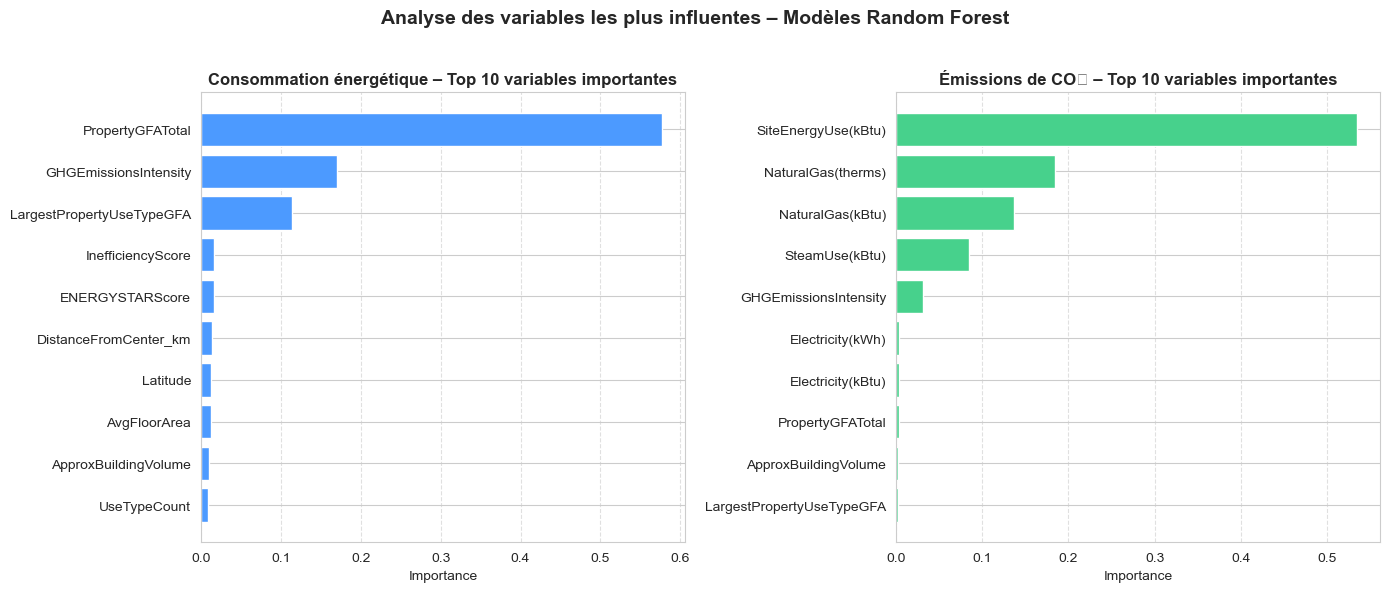

In [2088]:
import matplotlib.pyplot as plt
import pandas as pd

# === IMPORTANCES DES FEATURES ===

# Pour la consommation énergétique
rf_energy = trained_models_energy['Random Forest']
importances_energy = rf_energy.feature_importances_

# Pour les émissions de CO2
rf_emis = trained_models_emissions['Random Forest']
importances_emis = rf_emis.feature_importances_

# DataFrames triés
feat_imp_energy = (
    pd.DataFrame({
        'Variable': X_train_energy.columns,
        'Importance': importances_energy
    })
    .sort_values(by='Importance', ascending=False)
    .head(10)
)

feat_imp_emis = (
    pd.DataFrame({
        'Variable': X_train_emis.columns,
        'Importance': importances_emis
    })
    .sort_values(by='Importance', ascending=False)
    .head(10)
)

# === VISUALISATION ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1 : consommation énergétique
axes[0].barh(feat_imp_energy['Variable'], feat_imp_energy['Importance'], color='#4C9AFF')
axes[0].invert_yaxis()
axes[0].set_title("Consommation énergétique – Top 10 variables importantes", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Importance")
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# Graphique 2 : émissions de CO₂
axes[1].barh(feat_imp_emis['Variable'], feat_imp_emis['Importance'], color='#47D18C')
axes[1].invert_yaxis()
axes[1].set_title("Émissions de CO₂ – Top 10 variables importantes", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Importance")
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.suptitle("Analyse des variables les plus influentes – Modèles Random Forest", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
